In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [8]:
final_df = pd.read_csv('./data/0_1_4.csv', encoding='utf-8-sig')

In [3]:
final_df

기준년월            ID Segment  소지카드수_유효_신용  소지카드수_이용가능_신용  입회일자_신용  \
0           0  TRAIN_000000       D            1              1      259   
1           0  TRAIN_000001       E            1              1      314   
2           0  TRAIN_000002       C            1              1      202   
3           0  TRAIN_000003       D            2              2      299   
4           0  TRAIN_000004       E            1              1      324   
...       ...           ...     ...          ...            ...      ...   
2399995     5  TRAIN_399995       E            1              1      121   
2399996     5  TRAIN_399996       D            1              1      313   
2399997     5  TRAIN_399997       C            1              1      215   
2399998     5  TRAIN_399998       E            1              1      259   
2399999     5  TRAIN_399999       E            1              1      323   

         입회경과개월수_신용  유효카드수_신용체크  유효카드수_신용  유효카드수_신용_가족  ...  직장시도명_울산  \
0                67           2         1            0  ...     False   
1                12           1         1            0  ...     False   
2               124           2         1            0  ...     False   
3                27           3         2            0  ...     False   
4                 2           2         1            0  ...     False   
...             ...         ...       ...          ...  ...       ...   
2399995         209           2         1            0  ...      True   
2399996          17           1         1            0  ...     False   
2399997         115           1         1            0  ...     False   
2399998          71           1         1            0  ...     False   
2399999           7           2         2            0  ...     False   

         직장시도명_인천  직장시도명_전남  직장시도명_전북  직장시도명_제주  직장시도명_충남  직장시도명_충북  \
0           False     False     False     False     False     False   
1           False     False     False     False     False     False   
2           False     False     False     False     False     False   
3           False     False     False     False     False     False   
4           False     False     False     False     False     False   
...           ...       ...       ...       ...       ...       ...   
2399995     False     False     False     False     False     False   
2399996      True     False     False     False     False     False   
2399997     False     False     False     False     False     False   
2399998     False     False     False     False     False     False   
2399999     False     False     False     False     False     False   

         _2순위신용체크구분_신용  _2순위신용체크구분_없음  _2순위신용체크구분_체크  
0                False          False           True  
1                False           True          False  
2                False          False           True  
3                False          False           True  
4                False          False           True  
...                ...            ...            ...  
2399995          False          False           True  
2399996          False           True          False  
2399997          False           True          False  
2399998          False           True          False  
2399999           True          False          False  

[2400000 rows x 432 columns]

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Columns: 432 entries, 기준년월 to _2순위신용체크구분_체크
dtypes: bool(48), float64(12), int64(370), object(2)
memory usage: 7.0+ GB


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 세그먼트 비율 계산
segment_ratio = final_df['Segment'].value_counts(normalize=True).sort_index() * 100
segment_df = segment_ratio.reset_index()
segment_df.columns = ['Segment', 'Percentage']

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=segment_df, x='Segment', y='Percentage', palette='Set2')

plt.title('Segment별 비율 (%)')
plt.ylabel('Percentage (%)')
plt.xlabel('Segment')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 퍼센트 수치 표시
for index, row in segment_df.iterrows():
    plt.text(x=index, y=row['Percentage'] + 1, s=f"{row['Percentage']:.2f}%", ha='center')

plt.show()

NameError: name 'final_df' is not defined

In [8]:
# Segment 라벨 인코딩
final_df_encoded = final_df.copy()
final_df_encoded['Segment'] = final_df_encoded['Segment'].astype('category').cat.codes

In [9]:
# 상관계수 계산 대상 칼럼만 선택 (bool, float64, int64 타입 + Segment)
cols_for_corr = final_df_encoded.select_dtypes(include=['bool', 'float64', 'int64']).columns.tolist()
cols_for_corr.append('Segment')

In [ ]:
# Segment와 다른 칼럼들과의 상관계수 계산
correlation_series = final_df_encoded[cols_for_corr].corr()['Segment'].drop('Segment')

In [ ]:
# 결과 정리
correlation_df = correlation_series.reset_index()
correlation_df.columns = ['Feature', 'Correlation_with_Segment']

# CSV 파일 저장
correlation_df.to_csv('014_Segment_상관계수.csv', index=False)

print("014_Segment_상관계수.csv 저장 완료")

In [3]:
correlation_df = pd.read_csv('./014_Segment_상관계수.csv', encoding='utf-8-sig')

In [9]:
correlation_df

Feature  Correlation_with_Segment
0             기준년월             -4.246192e-14
1      소지카드수_유효_신용             -3.366334e-01
2    소지카드수_이용가능_신용             -3.230964e-01
3          입회일자_신용              2.522941e-01
4       입회경과개월수_신용             -2.522402e-01
..             ...                       ...
425       직장시도명_충남             -9.169917e-04
426       직장시도명_충북              8.648033e-03
427  _2순위신용체크구분_신용             -2.261960e-01
428  _2순위신용체크구분_없음              1.985103e-01
429  _2순위신용체크구분_체크              2.731274e-02

[430 rows x 2 columns]

In [ ]:
# 결과 정리 (소수점 6자리까지 반올림)
correlation_df = correlation_series.reset_index()
correlation_df.columns = ['Feature', 'Correlation_with_Segment']
correlation_df['Correlation_with_Segment'] = correlation_df['Correlation_with_Segment'].round(6)

# CSV 파일 저장
correlation_df.to_csv('014_Segment_상관계수.csv', index=False)

In [4]:
correlation_df

Feature  Correlation_with_Segment
0             기준년월                 -0.000000
1      소지카드수_유효_신용                 -0.336633
2    소지카드수_이용가능_신용                 -0.323096
3          입회일자_신용                  0.252294
4       입회경과개월수_신용                 -0.252240
..             ...                       ...
425       직장시도명_충남                 -0.000917
426       직장시도명_충북                  0.008648
427  _2순위신용체크구분_신용                 -0.226196
428  _2순위신용체크구분_없음                  0.198510
429  _2순위신용체크구분_체크                  0.027313

[430 rows x 2 columns]

In [5]:
# 절댓값 기준 내림차순 정렬
correlation_df = correlation_df.reindex(correlation_df['Correlation_with_Segment'].abs().sort_values(ascending=False).index).reset_index(drop=True)

In [6]:
correlation_df

Feature  Correlation_with_Segment
0       정상청구원금_B5M                 -0.660738
1       정상청구원금_B0M                 -0.634571
2       정상청구원금_B2M                 -0.628078
3    이용금액_R3M_신용체크                 -0.622827
4         청구금액_R6M                 -0.597904
..             ...                       ...
425       직장시도명_강원                  0.004076
426       직장시도명_광주                  0.003750
427       직장시도명_대전                 -0.002507
428       직장시도명_충남                 -0.000917
429           기준년월                 -0.000000

[430 rows x 2 columns]

In [7]:
# 절댓값 기준 0.1 미만인 피처 추출
low_corr_features_list = correlation_df[correlation_df['Correlation_with_Segment'].abs() < 0.1]['Feature'].tolist()

# 결과 확인
print(low_corr_features_list)


['최종유효년월_신용_이용', '직장시도명_경기', '직장시도명_전북', '_2순위신용체크구분_체크', '직장시도명_부산', '직장시도명_경북', '직장시도명_제주', '직장시도명_경남', '직장시도명_대구', '직장시도명_서울', '직장시도명_전남', '직장시도명_충북', '직장시도명_세종', '직장시도명_인천', '직장시도명_울산', '직장시도명_강원', '직장시도명_광주', '직장시도명_대전', '직장시도명_충남', '기준년월']


C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4016436255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df_sorted, y='Feature', x='abs_corr', palette='coolwarm')


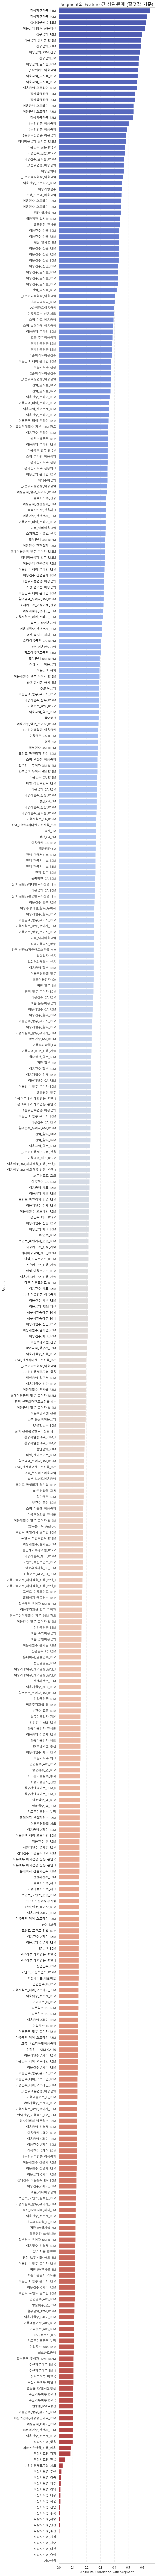

In [44]:
plt.figure(figsize=(8, len(correlation_df_sorted) * 0.3))  # 길이에 따라 자동 높이 조절
sns.barplot(data=correlation_df_sorted, y='Feature', x='abs_corr', palette='coolwarm')
plt.title('Segment와 Feature 간 상관관계 (절댓값 기준)', fontsize=16)
plt.xlabel('Absolute Correlation with Segment')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\1933307955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Feature', y='abs_corr', palette='coolwarm')


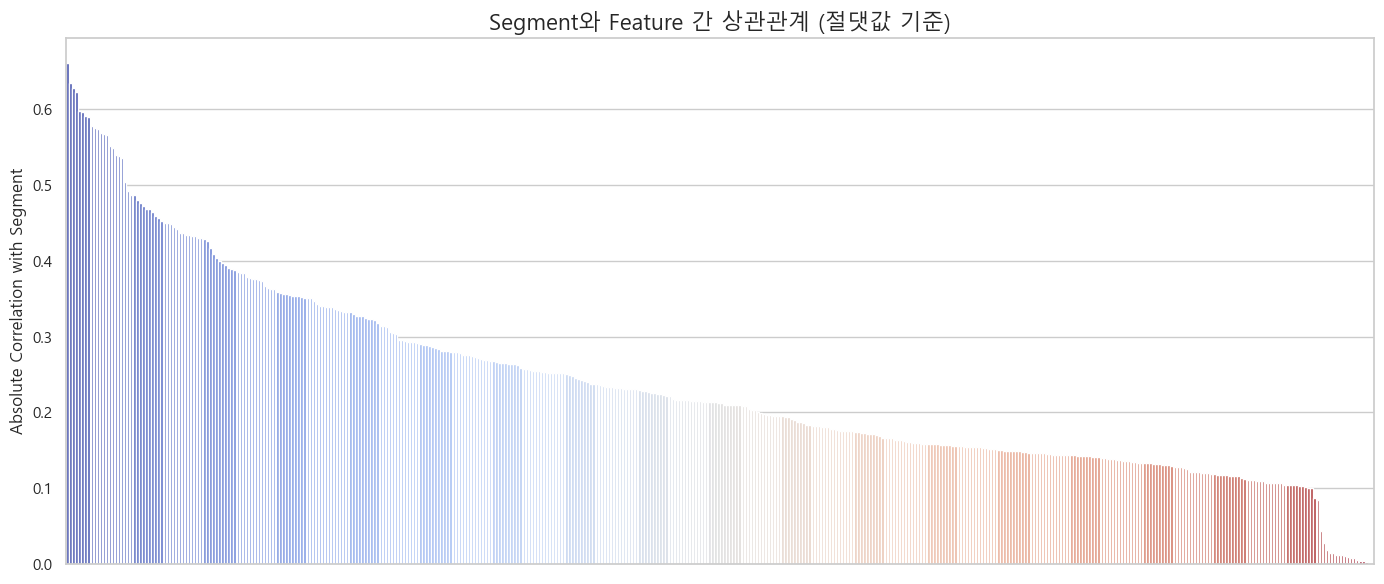

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 절댓값 컬럼 추가
correlation_df['abs_corr'] = correlation_df['Correlation_with_Segment'].abs()

# 막대그래프 (x축 Feature 이름 제거)
plt.figure(figsize=(14, 6))
sns.barplot(data=correlation_df, x='Feature', y='abs_corr', palette='coolwarm')

# 축 설정
plt.xlabel('')
plt.xticks([], [])  # x축 라벨과 눈금 제거
plt.ylabel('Absolute Correlation with Segment')
plt.title('Segment와 Feature 간 상관관계 (절댓값 기준)', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\1312306119.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_corr_df, x='Feature', y='abs_corr', palette='coolwarm')


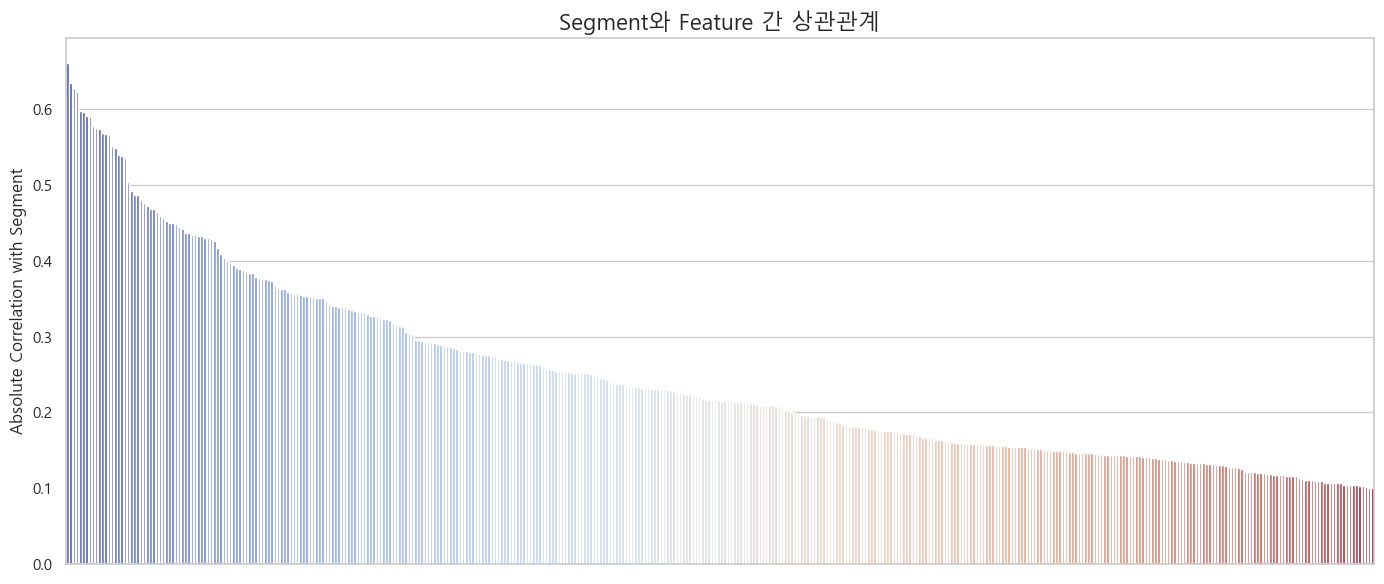

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 절댓값 컬럼 추가
correlation_df['abs_corr'] = correlation_df['Correlation_with_Segment'].abs()

# 절댓값이 0.1 이상인 데이터만 필터링
filtered_corr_df = correlation_df[correlation_df['abs_corr'] >= 0.1]

# 막대그래프 (x축 Feature 이름 제거)
plt.figure(figsize=(14, 6))
sns.barplot(data=filtered_corr_df, x='Feature', y='abs_corr', palette='coolwarm')

# 축 설정
plt.xlabel('')
plt.xticks([], [])  # x축 라벨과 눈금 제거
plt.ylabel('Absolute Correlation with Segment')
plt.title('Segment와 Feature 간 상관관계', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
# 상관계수 절댓값이 0.5 이상인 행만 필터링
strong_corr_df = correlation_df[correlation_df['Correlation_with_Segment'].abs() >= 0.5].reset_index(drop=True)

In [40]:
strong_corr_df

Feature  Correlation_with_Segment
0      정상청구원금_B5M                 -0.660738
1      정상청구원금_B0M                 -0.634571
2      정상청구원금_B2M                 -0.628078
3   이용금액_R3M_신용체크                 -0.622827
4        청구금액_R6M                 -0.597904
5   이용금액_일시불_R12M                 -0.595858
6        청구금액_R3M                 -0.590678
7     이용금액_R3M_신용                 -0.589032
8         청구금액_B0                 -0.577988
9    이용금액_일시불_B0M                 -0.575032
10     _1순위카드이용금액                 -0.573870
11   이용금액_일시불_R6M                 -0.568893
12   이용금액_일시불_R3M                 -0.567357
13  이용금액_오프라인_B0M                 -0.566186
14     정상입금원금_B5M                 -0.551228
15     정상입금원금_B0M                 -0.549280
16  이용금액_오프라인_R3M                 -0.539827
17  이용금액_오프라인_R6M                 -0.538775
18     정상입금원금_B2M                 -0.536208
19    _3순위업종_이용금액                 -0.504268

In [4]:
# 상관계수 절댓값 기준 상위 10개 피처 추출
strong_corr_df = correlation_df.copy()
strong_corr_df['abs_corr'] = strong_corr_df['Correlation_with_Segment'].abs()

# 절댓값 기준으로 정렬 후 상위 10개 선택
strong_corr_df = strong_corr_df.sort_values(by='abs_corr', ascending=False).head(10).reset_index(drop=True)
strong_corr_df

Feature  Correlation_with_Segment  abs_corr
0     정상청구원금_B5M                 -0.660738  0.660738
1     정상청구원금_B0M                 -0.634571  0.634571
2     정상청구원금_B2M                 -0.628078  0.628078
3  이용금액_R3M_신용체크                 -0.622827  0.622827
4       청구금액_R6M                 -0.597904  0.597904
5  이용금액_일시불_R12M                 -0.595858  0.595858
6       청구금액_R3M                 -0.590678  0.590678
7    이용금액_R3M_신용                 -0.589032  0.589032
8        청구금액_B0                 -0.577988  0.577988
9   이용금액_일시불_B0M                 -0.575032  0.575032

In [7]:
import matplotlib as mpl

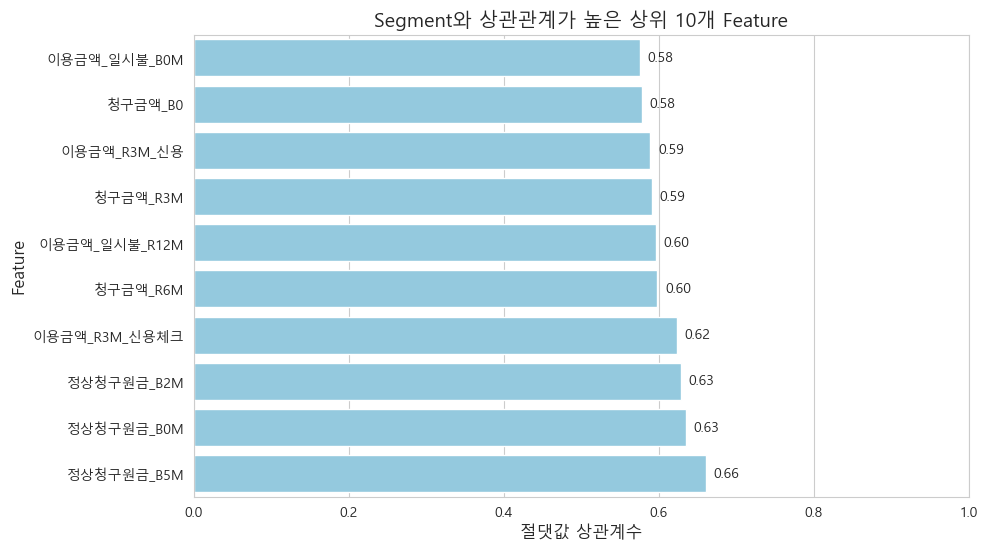

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 절댓값 기준 상위 10개 정렬 (이미 추출된 strong_corr_df에서)
strong_corr_df_sorted = strong_corr_df.copy()
strong_corr_df_sorted['abs_corr'] = strong_corr_df_sorted['Correlation_with_Segment'].abs()
strong_corr_df_sorted = strong_corr_df_sorted.sort_values(by='abs_corr', ascending=True)  # 가로바 위해 오름차순

# 그래프 설정
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# rcParams에 폰트 이름 등록
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 가로 막대그래프
ax = sns.barplot(
    data=strong_corr_df_sorted,
    y='Feature',
    x='abs_corr',
    color='skyblue'
)

# 상관계수 값 텍스트로 표시
for i, value in enumerate(strong_corr_df_sorted['abs_corr']):
    ax.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10)

# 타이틀 및 라벨 설정
plt.title('Segment와 상관관계가 높은 상위 10개 Feature', fontsize=14)
plt.xlabel('절댓값 상관계수', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xlim(0, 1)

plt.show()


In [18]:
# strong_corr_df의 Feature 칼럼 값을 리스트로 추출
strong_features = strong_corr_df['Feature'].tolist()

# final_df에서 해당 피처들만 추출
final_strong_df = final_df[strong_features]

In [19]:
final_strong_df

정상청구원금_B5M  정상청구원금_B0M  정상청구원금_B2M  이용금액_R3M_신용체크  청구금액_R6M  \
0             14958       14440       16524            196     88693   
1              3367        6024        2420          13475     16861   
2             23963       21929       21826          23988    165221   
3             19614       18563       19172           3904    127371   
4                 0           0         272           1190       155   
...             ...         ...         ...            ...       ...   
2399995           0          19           0          10755         0   
2399996       23742       13462       14844          27636     99849   
2399997        4125        7049        6862          23187     41073   
2399998         507           0           0              0         0   
2399999        4514        3129        5357          21463     19948   

         이용금액_일시불_R12M  청구금액_R3M  이용금액_R3M_신용  청구금액_B0  이용금액_일시불_B0M  \
0                20667     46588          196    12226          1995   
1                54341     10530        13475     5834          2862   
2                55656     85931        23988    21866          5854   
3                10753     61518         3904    16356           387   
4                -2129         0            0        0             0   
...                ...       ...          ...      ...           ...   
2399995              0         0         7267        0             0   
2399996         148106     37515        27636    14402          7663   
2399997          52233     22274        23187     5731          4545   
2399998              0         0            0        0             0   
2399999          12962      9704        21463     3422          2693   

         _1순위카드이용금액  이용금액_일시불_R6M  이용금액_일시불_R3M  이용금액_오프라인_B0M  정상입금원금_B5M  \
0              3681          8380          2877           4043        9205   
1             13323         19426         14316           3980        2546   
2             24493         35136         15694           4524       16949   
3              5933         -7031         -2710           3975        8418   
4                 0           957         -3383              0           0   
...             ...           ...           ...            ...         ...   
2399995        5640             0             0              0           0   
2399996       26357         58916         24946           4676       21831   
2399997       17171         26974         13424           4516        3269   
2399998           0             0             0              0           0   
2399999        6984         18887          9334              0        3647   

         정상입금원금_B0M  이용금액_오프라인_R3M  이용금액_오프라인_R6M  정상입금원금_B2M  _3순위업종_이용금액  
0              6335           4131          11097       16125          672  
1              5198          14339          18638        2420         1659  
2             12564          12250          29192       14448         1362  
3              7639          10408          18056       13043          774  
4                 0              0            787           0            0  
...             ...            ...            ...         ...          ...  
2399995           0              0              0           0            0  
2399996        9705          25205          60373       10764         1547  
2399997        5346          13267          32036        6106         2302  
2399998           0              0              0           0            0  
2399999        2662              0           4537        3173          894  

[2400000 rows x 20 columns]

In [20]:
# strong_corr_df의 Feature 칼럼과 Segment 칼럼을 함께 선택
strong_features_with_segment = strong_corr_df['Feature'].tolist() + ['Segment']

# final_df에서 해당 피처들만 추출
final_strong_df = final_df[strong_features_with_segment]

In [32]:
# 세그먼트별 평균 계산
segment_mean = final_strong_df.groupby('Segment').mean()

# 세그먼트별 중앙값 계산
segment_median = final_strong_df.groupby('Segment').median()

# 결과 출력
print("세그먼트별 평균:")
print(segment_mean)

print("\n세그먼트별 중앙값:")
print(segment_median)

세그먼트별 평균:
           정상청구원금_B5M    정상청구원금_B0M    정상청구원금_B2M  이용금액_R3M_신용체크  \
Segment                                                            
A        46524.772634  37794.282922  40439.004115   98294.205761   
B        44320.881944  36986.013889  39872.402778   91296.145833   
C        20804.364629  18517.785375  19186.696269   60613.194490   
D        11555.265824  10263.198994  10771.873266   38603.933347   
E         3496.729219   3175.572234   3409.400185   10054.584928   

              청구금액_R6M  이용금액_일시불_R12M       청구금액_R3M   이용금액_R3M_신용  \
Segment                                                              
A        316939.458848  383015.557613  151168.328189  97090.131687   
B        316174.256944  323990.812500  148207.687500  88537.069444   
C        128408.240129  176200.498182   61462.174896  54590.519092   
D         69963.942264   98273.571446   33112.578759  34187.231318   
E         19778.687382   26353.869354    9454.453713   9196.652264   

              청구금액_B0 

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


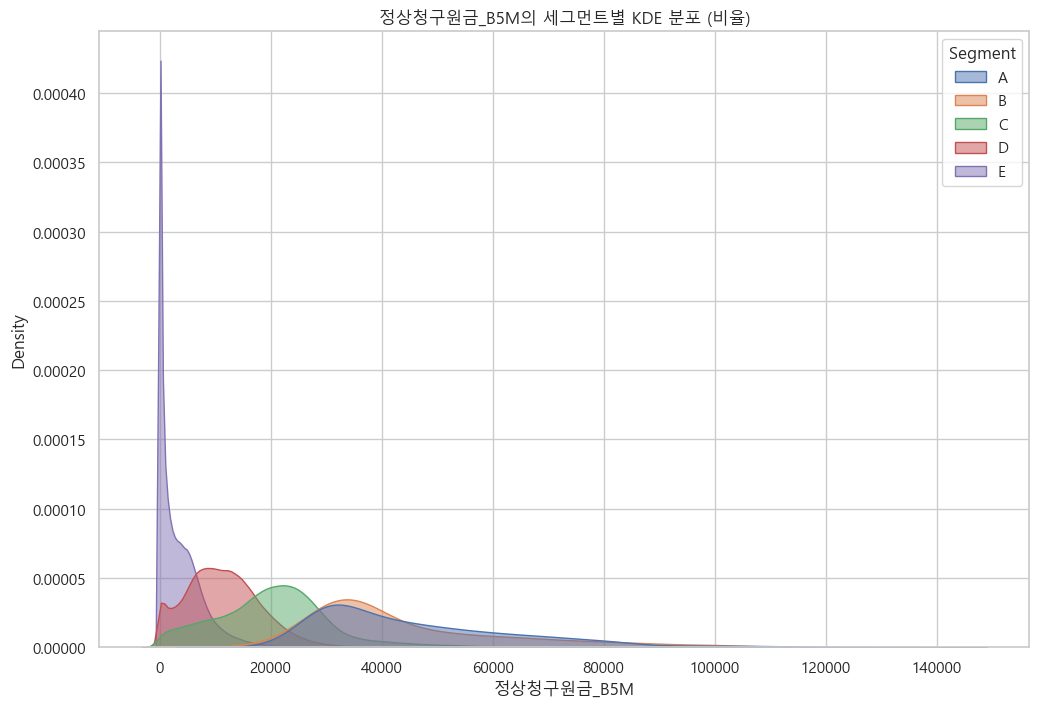

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


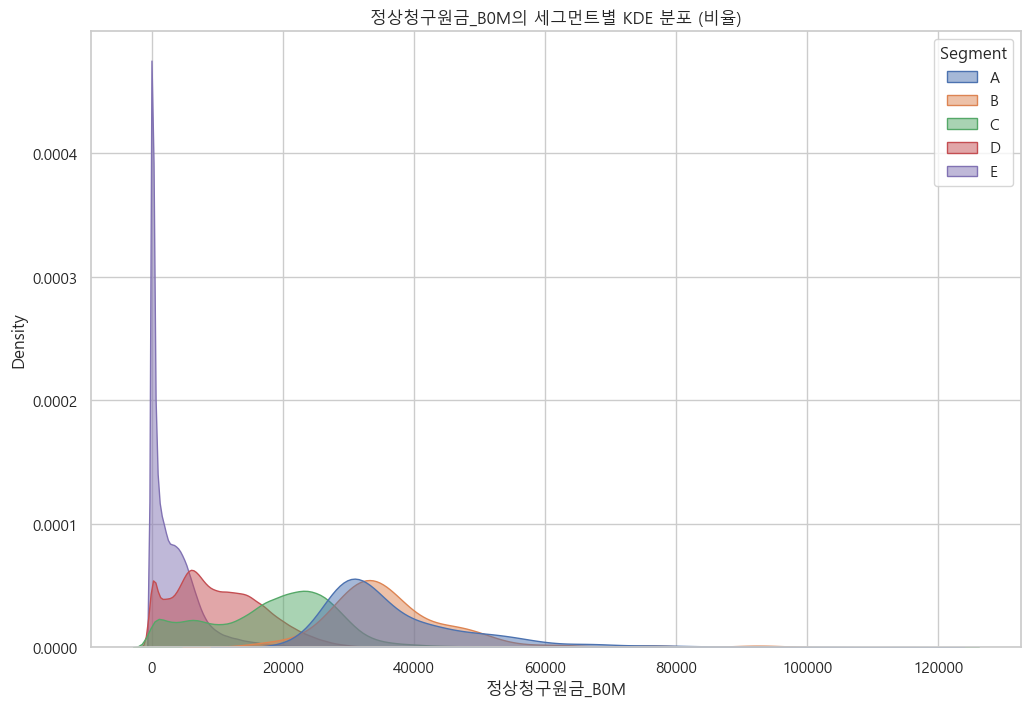

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


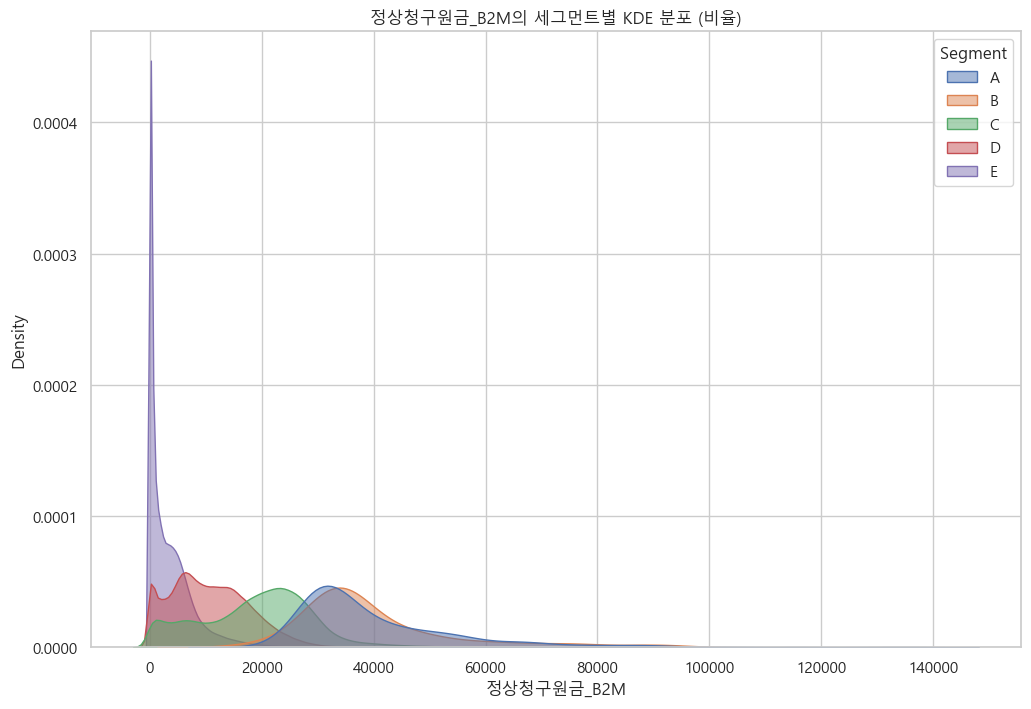

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


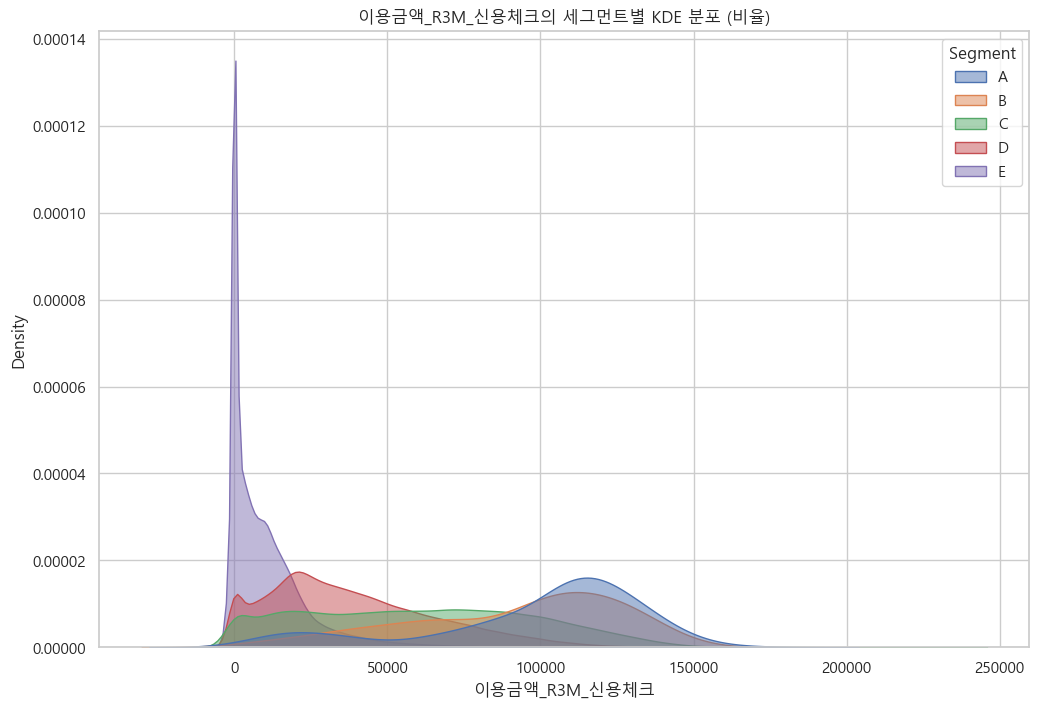

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


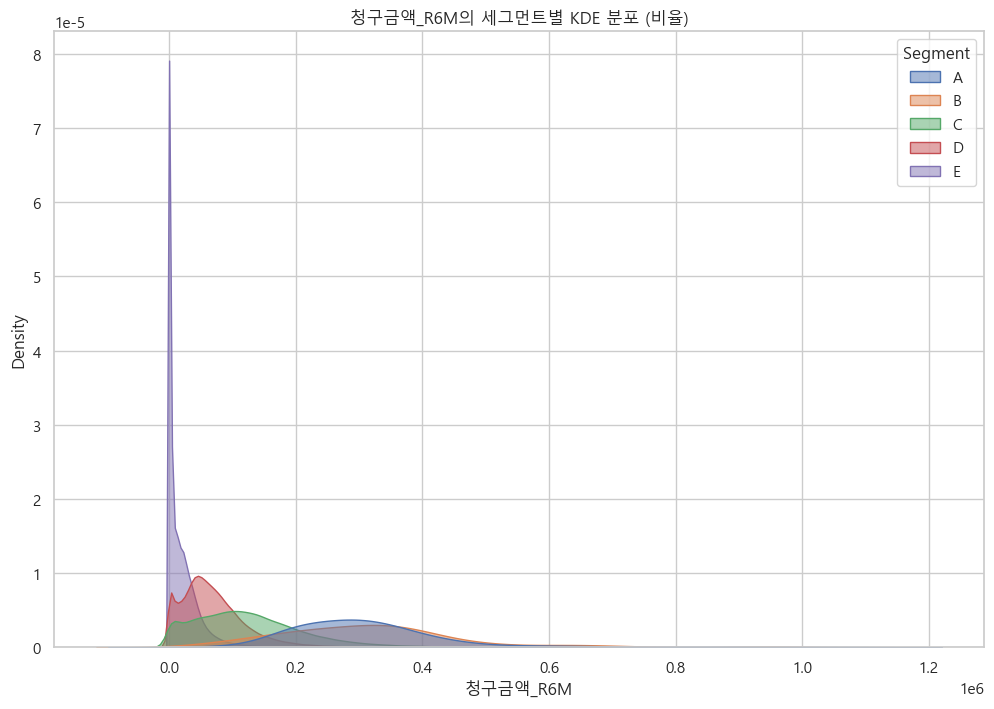

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


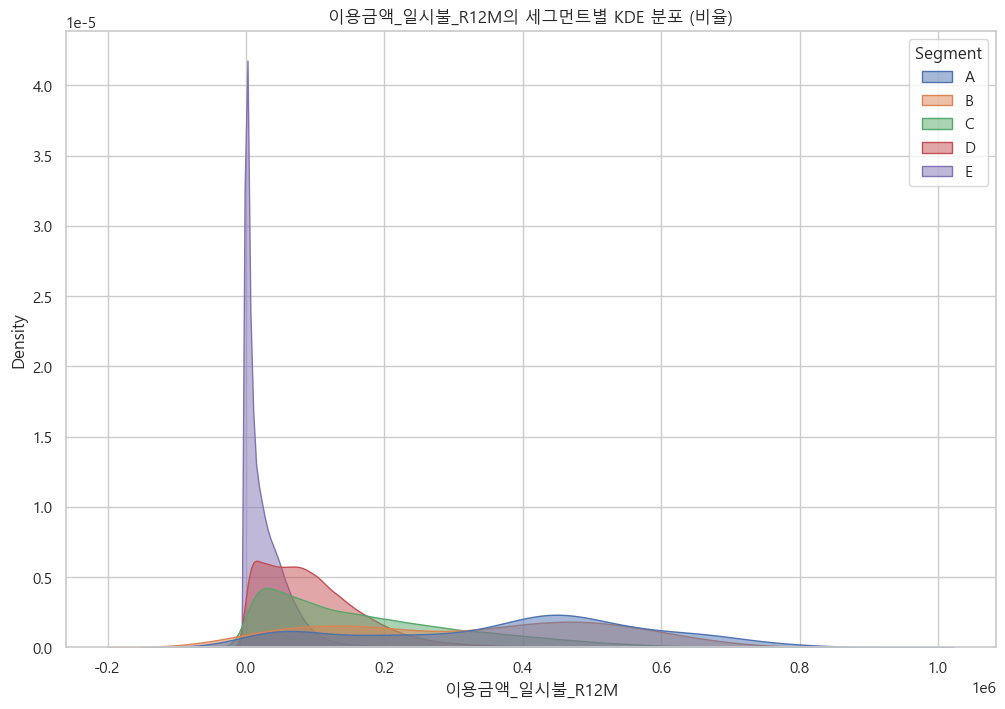

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


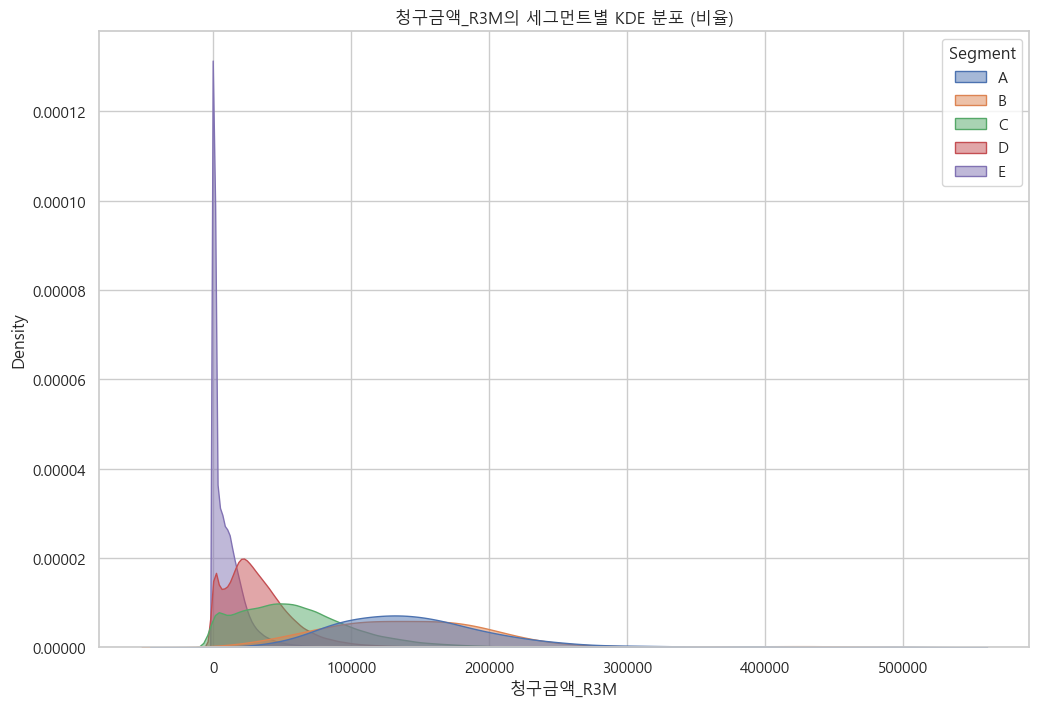

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


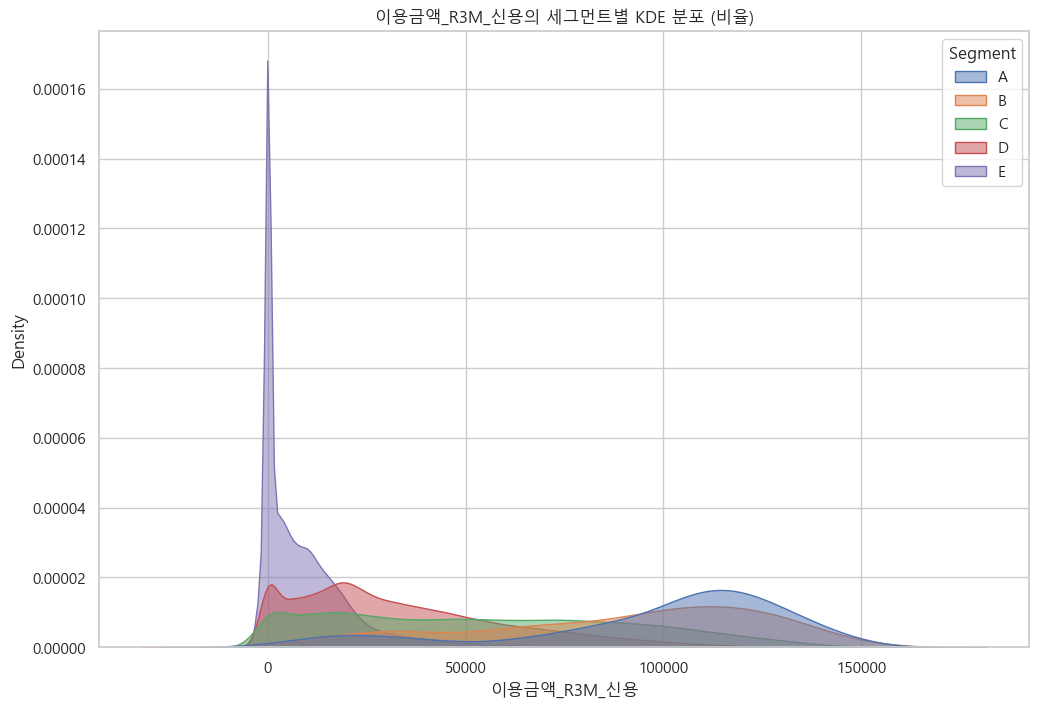

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


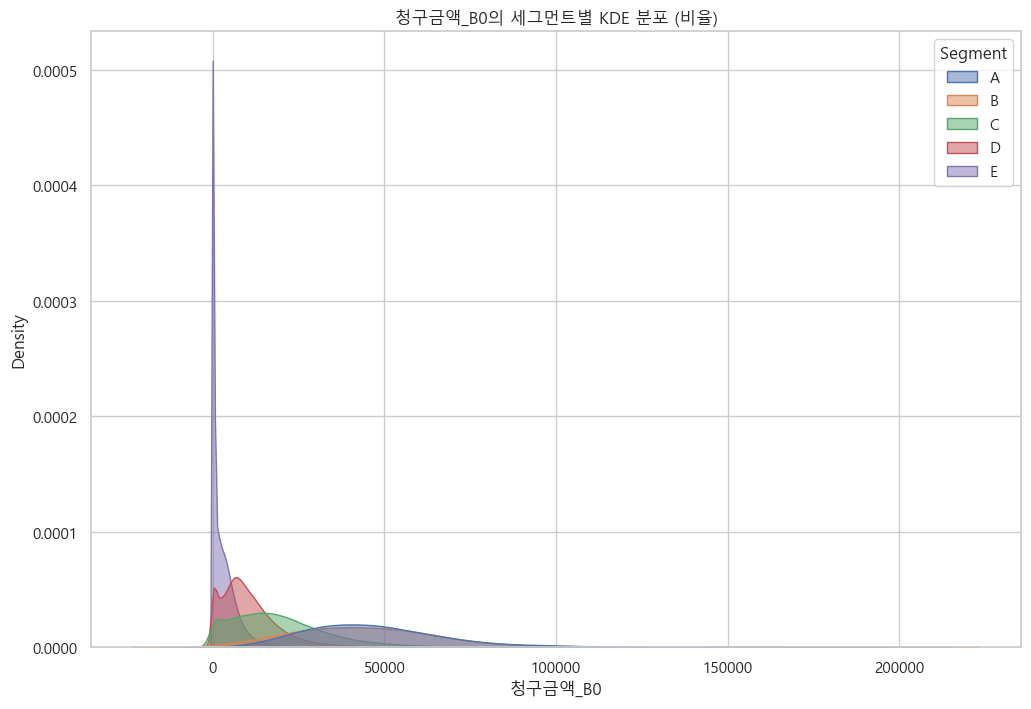

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


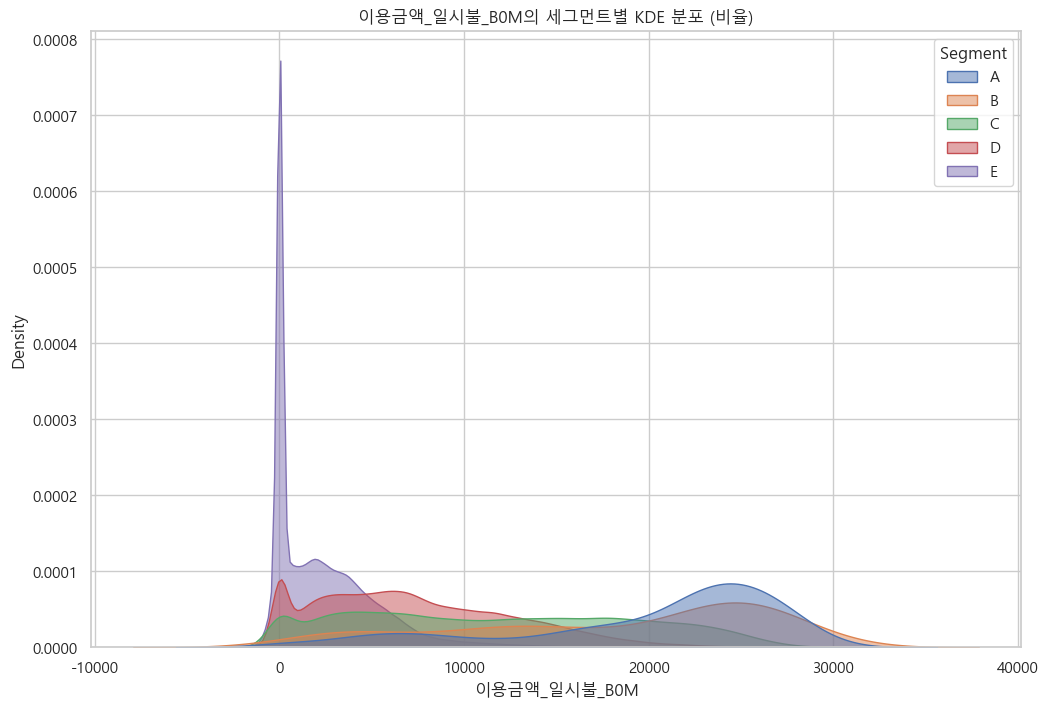

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


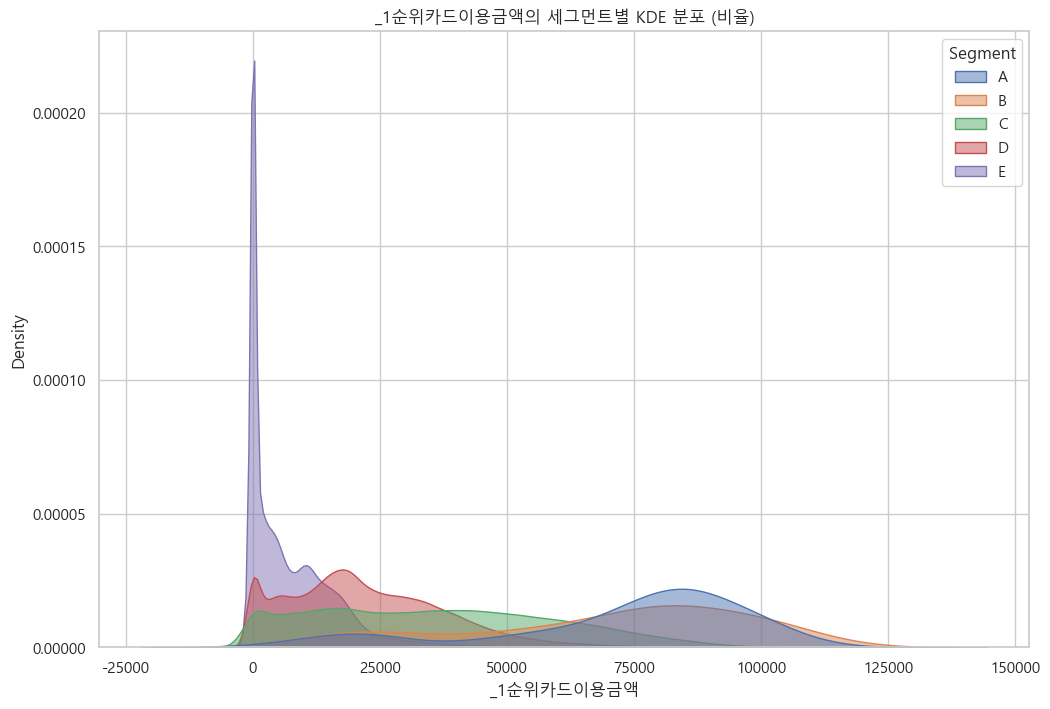

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


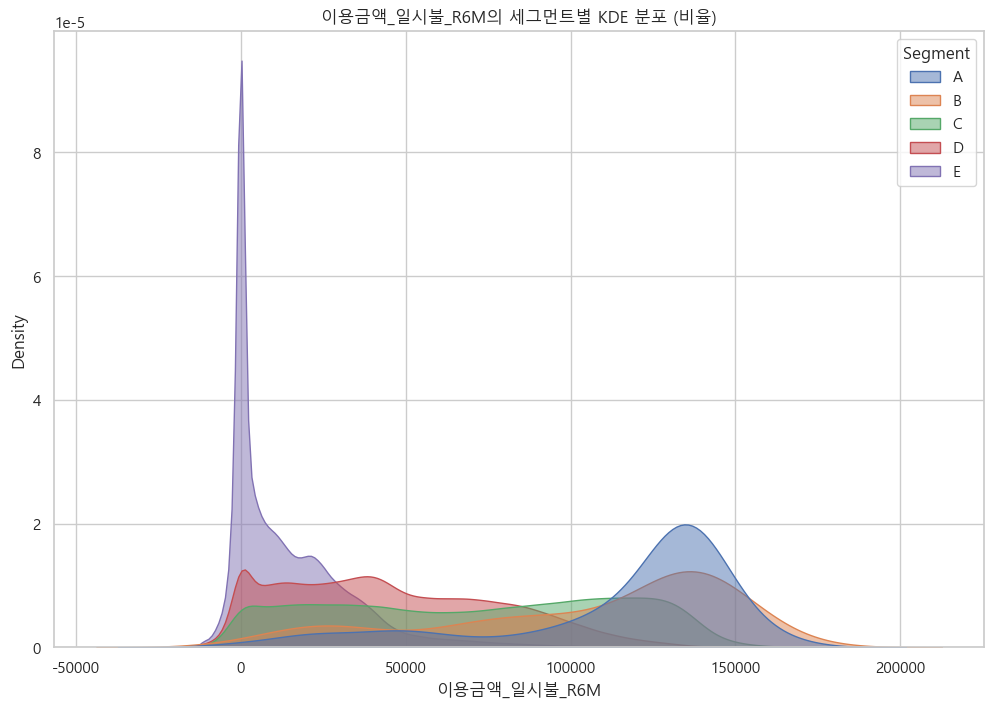

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


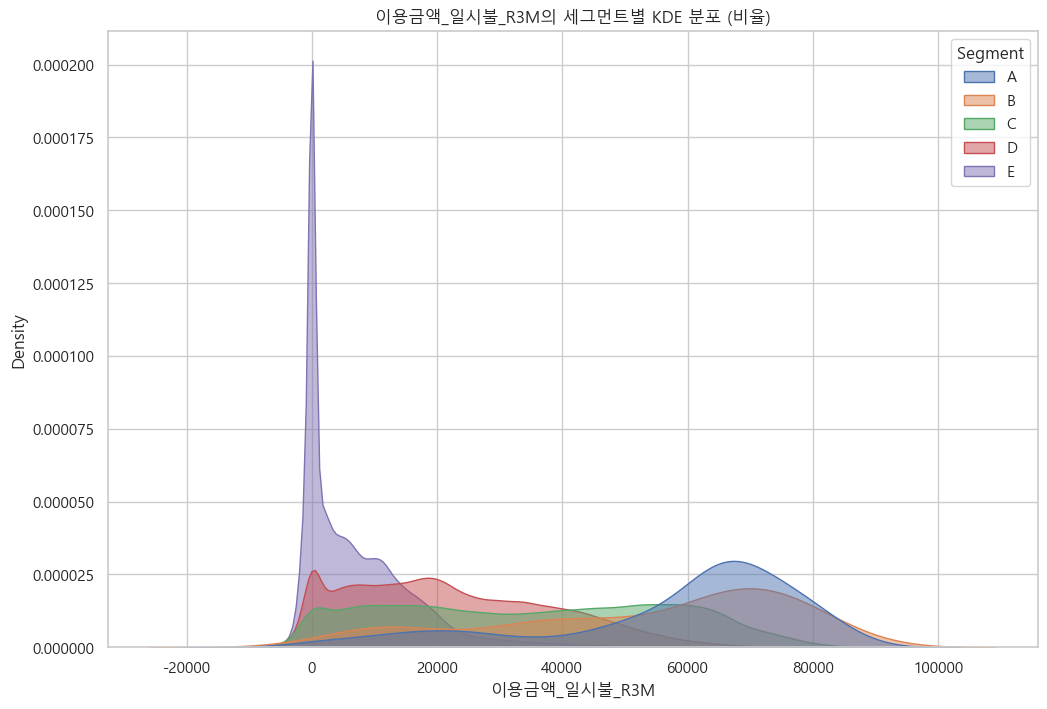

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


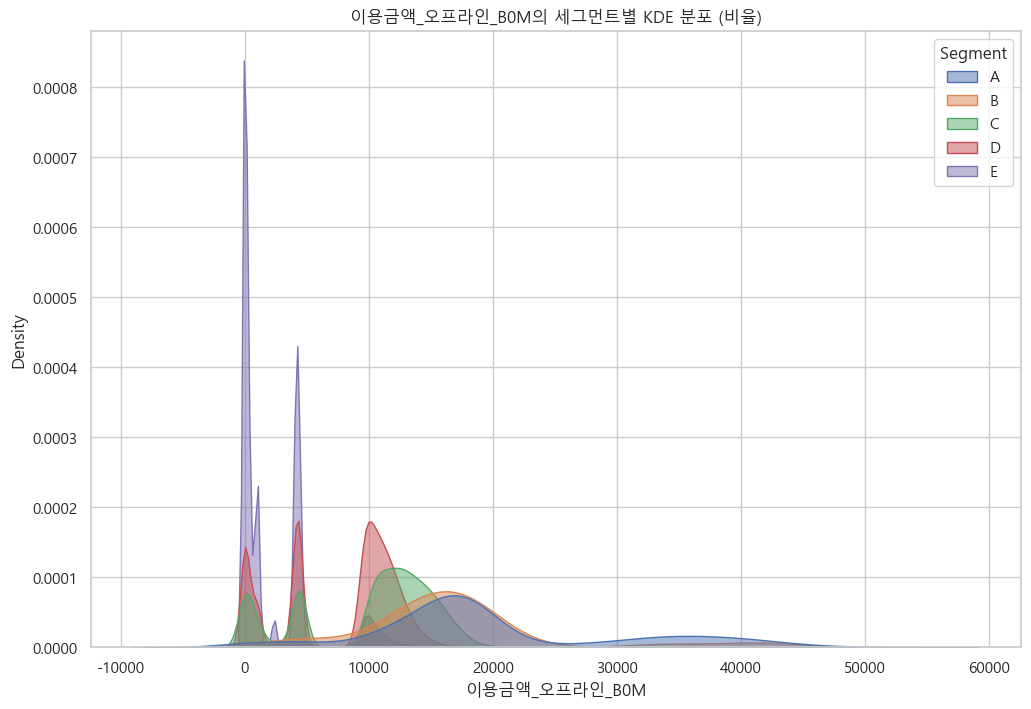

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


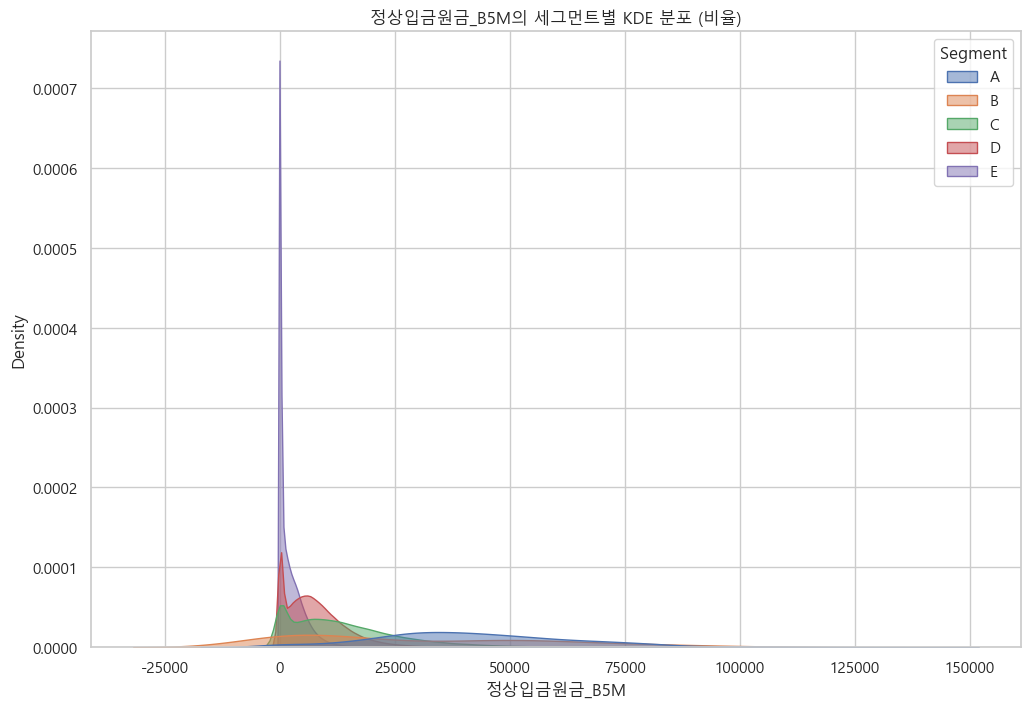

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


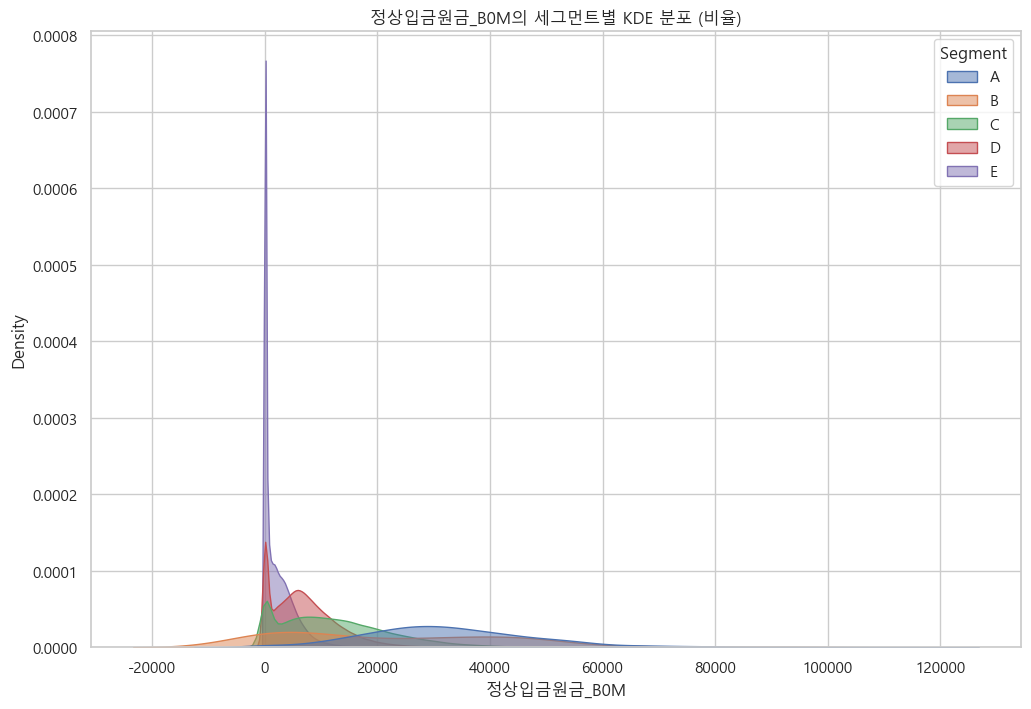

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


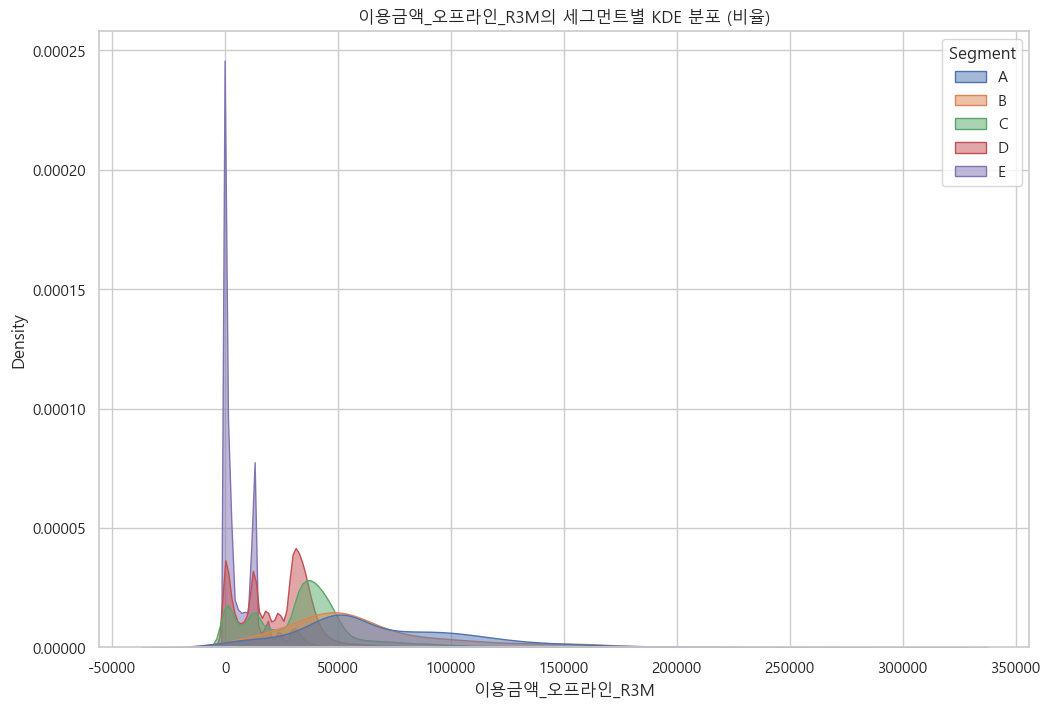

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


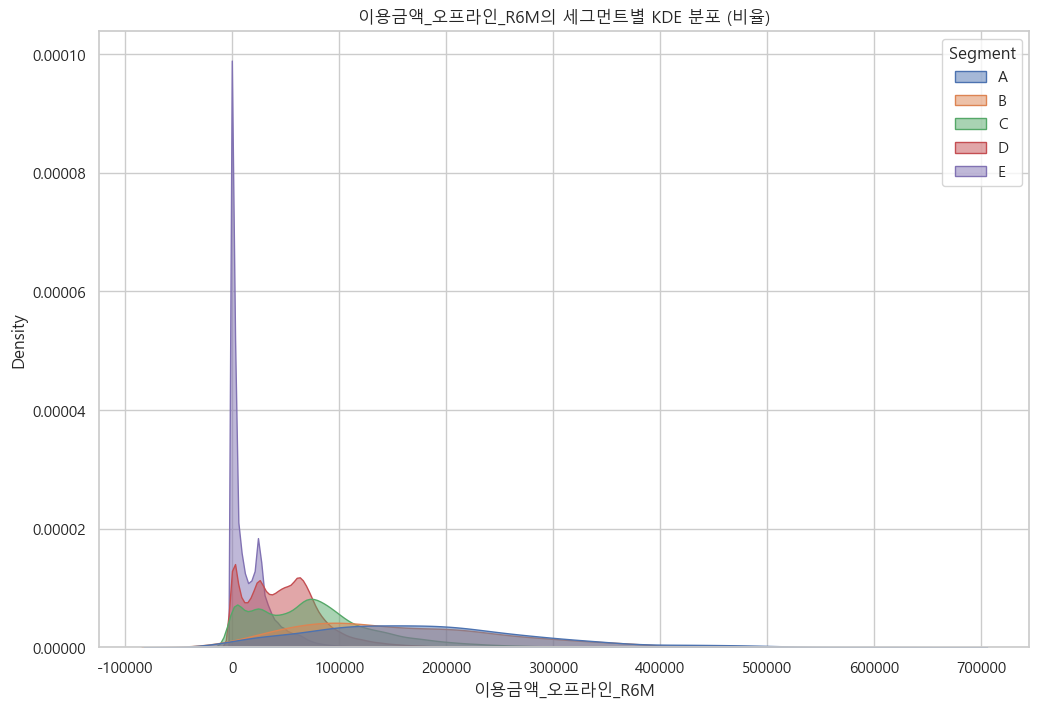

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


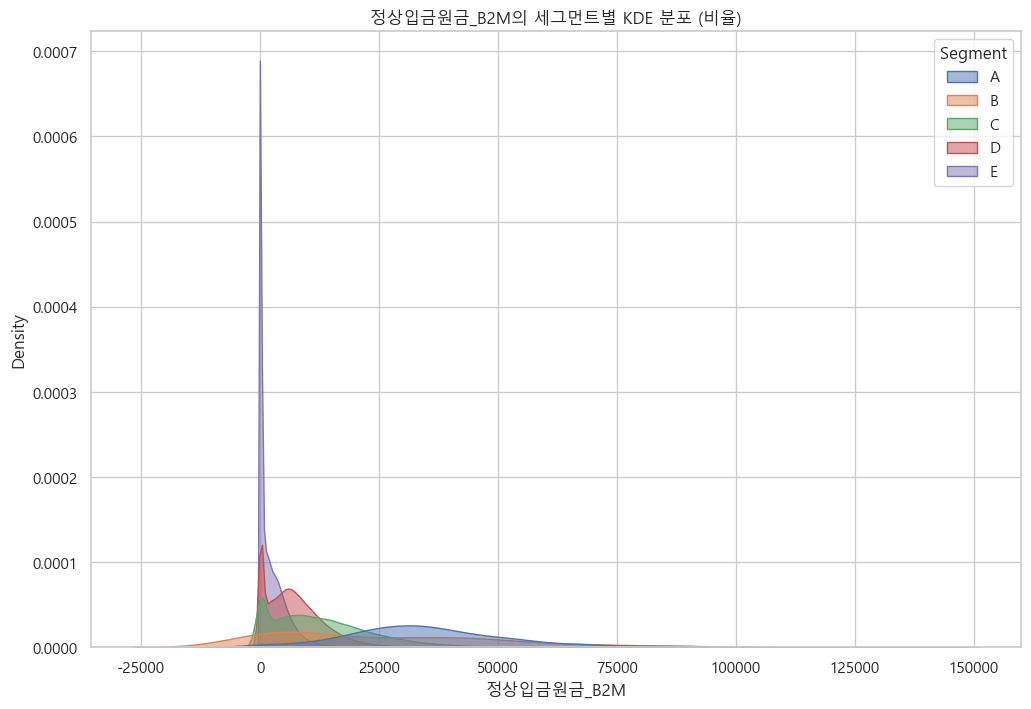

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\4163482190.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


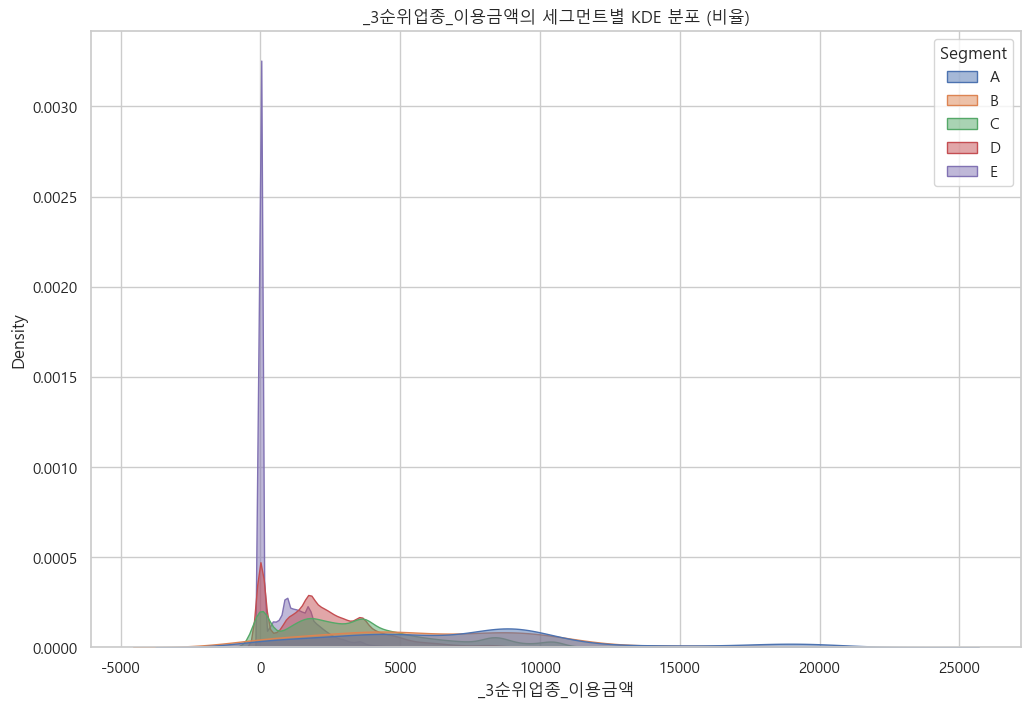

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화 대상 피처 (Segment 제외)
features = final_strong_df.columns.drop('Segment')

# 2개씩 나누기
chunk_size = 2
numeric_chunks = [features[i:i + chunk_size] for i in range(0, len(features), chunk_size)]

# 함수 정의: 각 수치형 변수에 대해 세그먼트별 KDE 시각화 (비율 기준)
def plot_segment_kde_numeric(df, cols):
    for col in cols:
        # 각 세그먼트별로 데이터 추출
        plt.figure(figsize=(12, 8))
        
        # kdeplot 그리기
        sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)

        # 타이틀 및 레이블 설정
        plt.title(f'{col}의 세그먼트별 KDE 분포 (비율)')
        plt.xlabel(col)
        plt.ylabel('Density')

        # 그래프 출력
        plt.show()

# 2씩 나눠서 시각화
for chunk in numeric_chunks:
    plot_segment_kde_numeric(final_strong_df, chunk)


In [52]:
# 절댓값 0.1 이상 필터링 후, 그 중에서 하위 20개 추출
low_corr_df = correlation_df.copy()
low_corr_df['abs_corr'] = low_corr_df['Correlation_with_Segment'].abs()

# 필터링 및 정렬
low_corr_df = low_corr_df[low_corr_df['abs_corr'] >= 0.1]
low_corr_df = low_corr_df.sort_values(by='abs_corr', ascending=True).head(20).reset_index(drop=True)

# 결과 확인
low_corr_df

Feature  Correlation_with_Segment  abs_corr
0            직장시도명_없음                  0.100240  0.100240
1        이용건수_선결제_R3M                 -0.100796  0.100796
2      IB문의건수_선결제_R6M                 -0.101905  0.101905
3        이용금액_D페이_R6M                 -0.102419  0.102419
4   IB문의건수_사용승인내역_R6M                 -0.103141  0.103141
5     이용건수_할부_유이자_B0M                 -0.103928  0.103928
6          변동률_RVCA평잔                 -0.104127  0.104127
7         수신거부여부_DM_0                  0.104624  0.104624
8         수신거부여부_DM_1                 -0.104624  0.104624
9         변동률_RV일시불평잔                 -0.104848  0.104848
10        수신거부여부_메일_1                 -0.106260  0.106260
11        수신거부여부_메일_0                  0.106260  0.106260
12        수신거부여부_TM_1                 -0.106519  0.106519
13        수신거부여부_TM_0                  0.106519  0.106519
14  할부금액_무이자_12M_R12M                 -0.106619  0.106619
15             최초한도금액                 -0.107069  0.107069
16       인입횟수_ARS_R6M                  0.109217  0.109217
17         카드론이용금액_누적                 -0.109821  0.109821
18         OS구분코드_IOS                 -0.109997  0.109997
19       인입횟수_ARS_B0M                 -0.110405  0.110405

In [57]:
# strong_corr_df의 Feature 칼럼 값을 리스트로 추출
low_features = low_corr_df['Feature'].tolist()

# final_df에서 해당 피처들만 추출
final_low_df = final_df[low_features]

In [60]:
# strong_corr_df의 Feature 칼럼과 Segment 칼럼을 함께 선택
strong_features_with_segment = low_corr_df['Feature'].tolist() + ['Segment']

# final_df에서 해당 피처들만 추출
final_low_df = final_df[strong_features_with_segment]

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)
C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


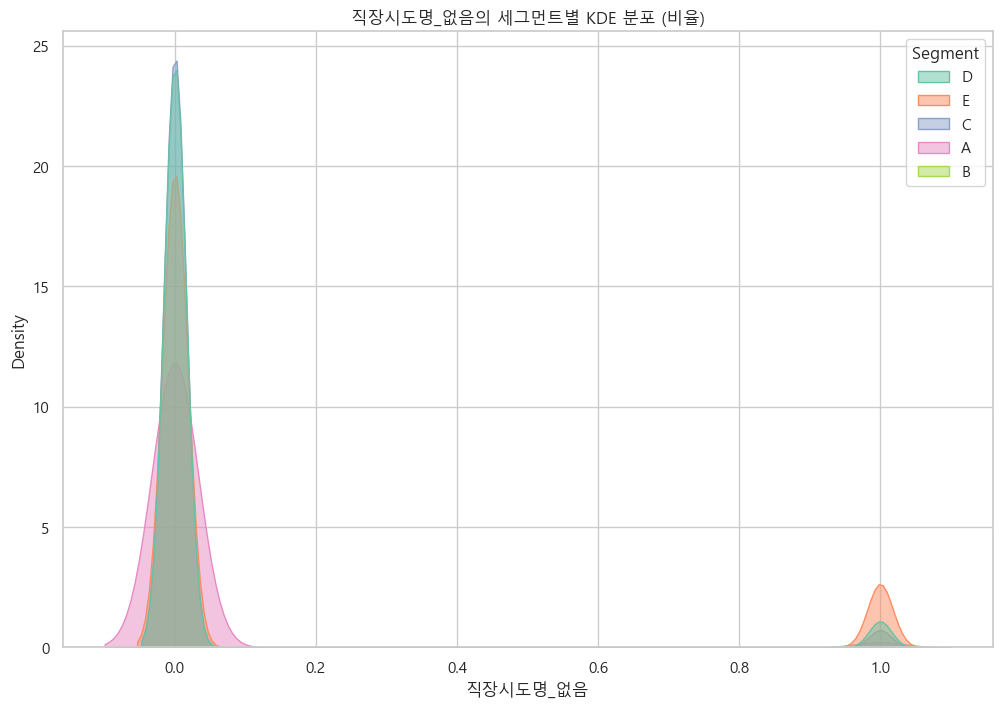

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


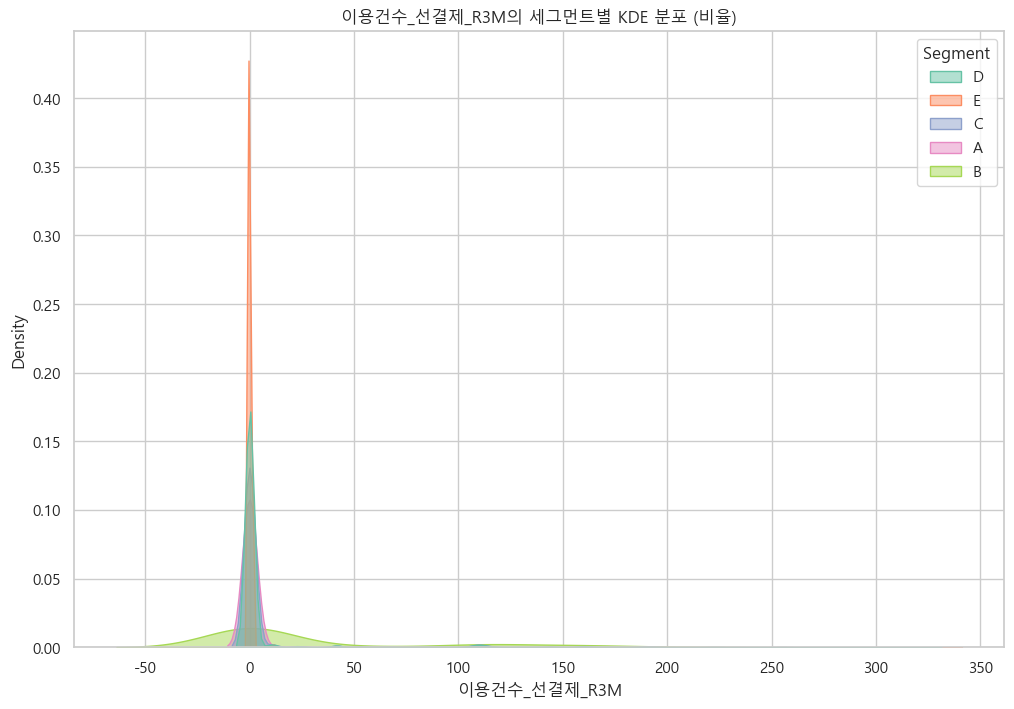

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


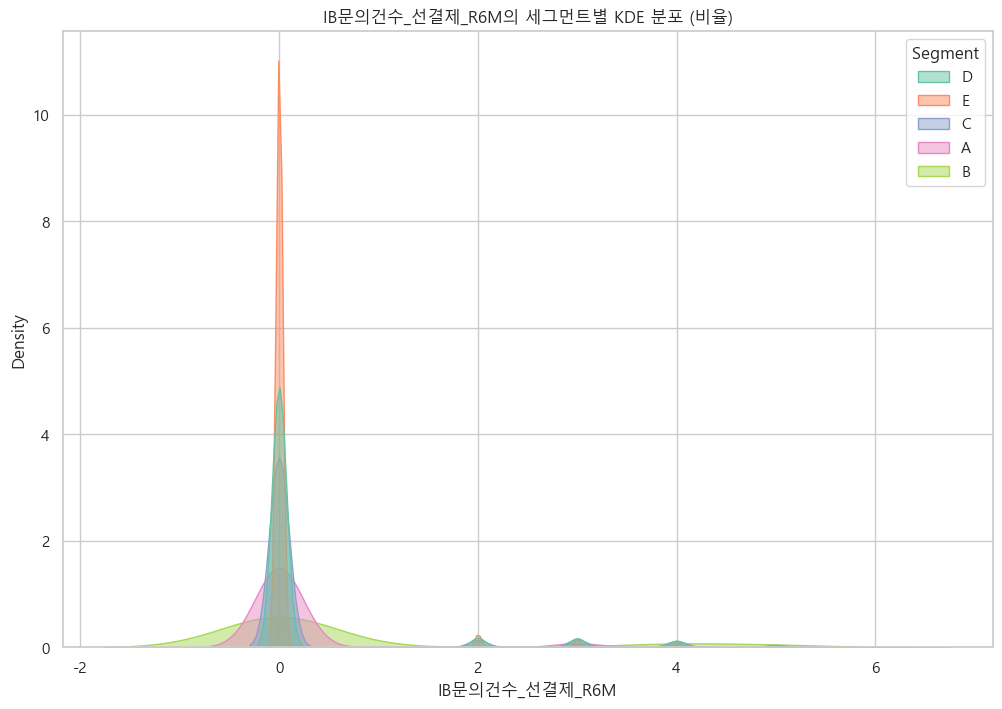

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


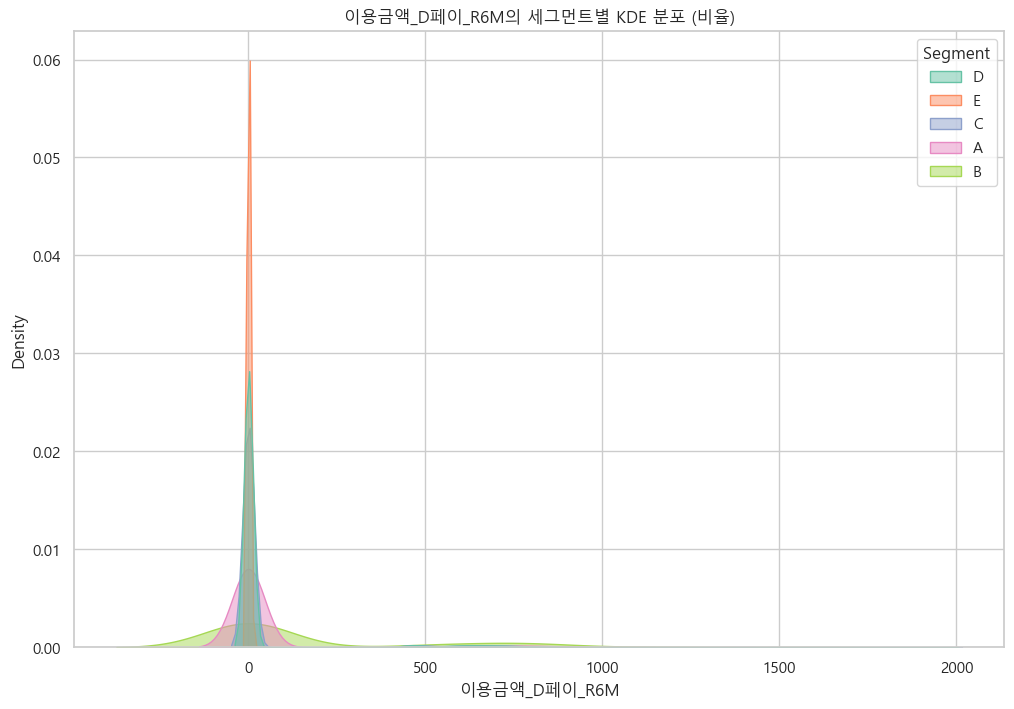

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


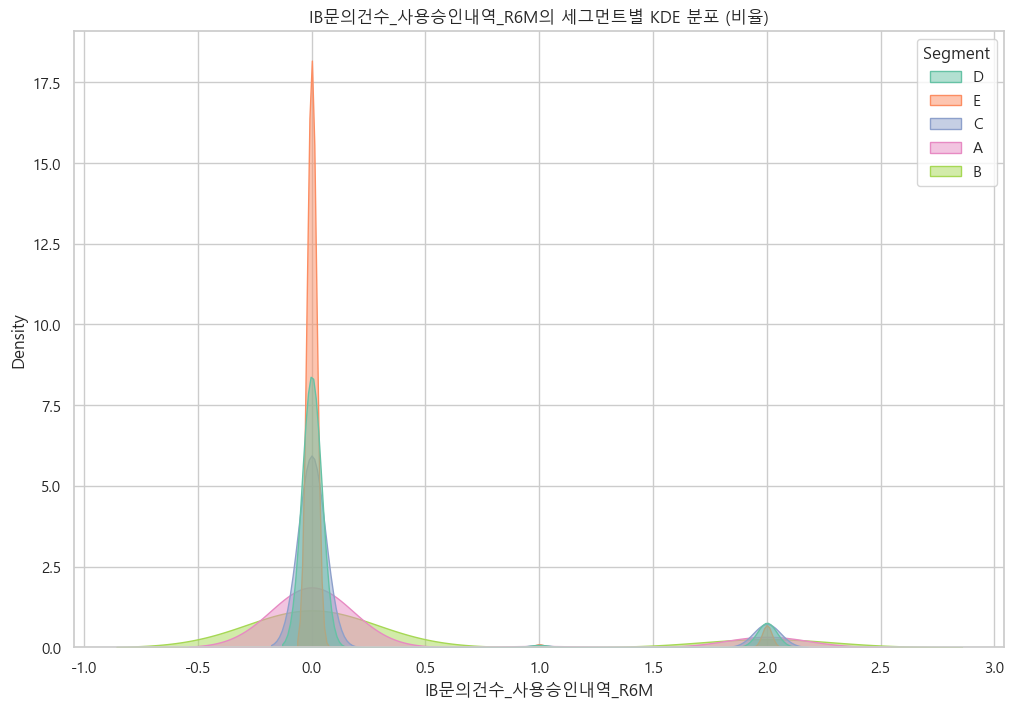

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


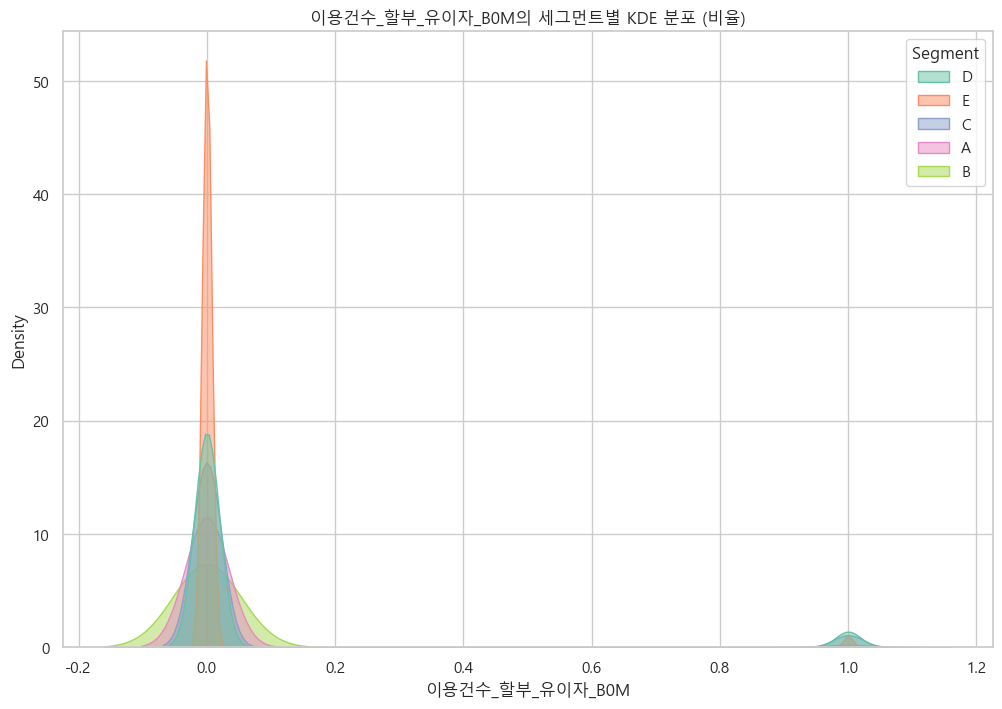

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


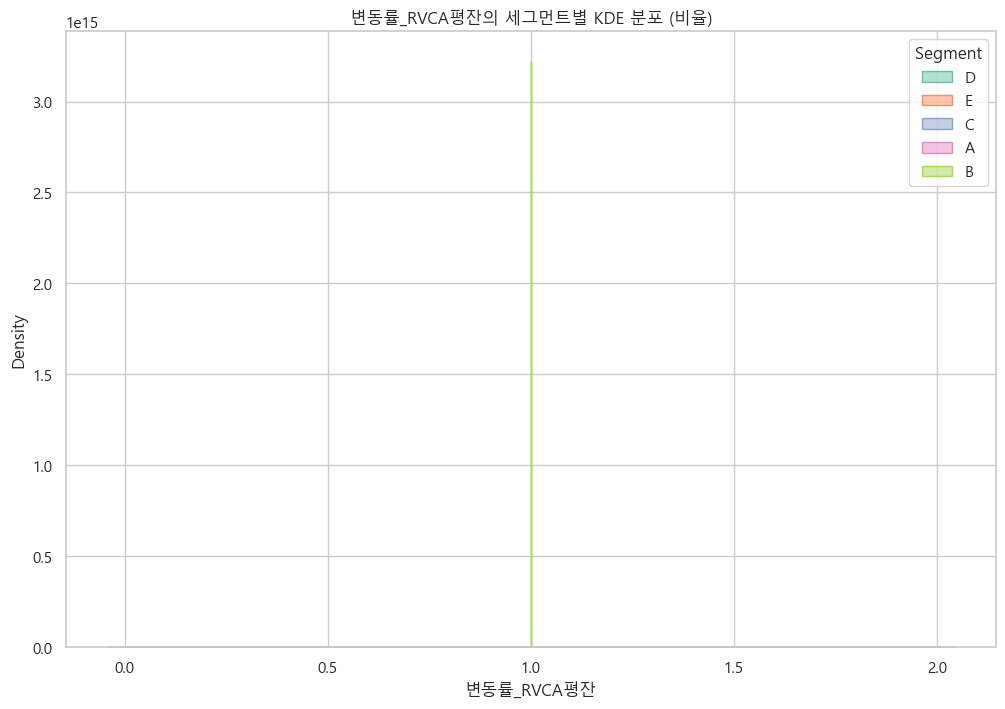

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


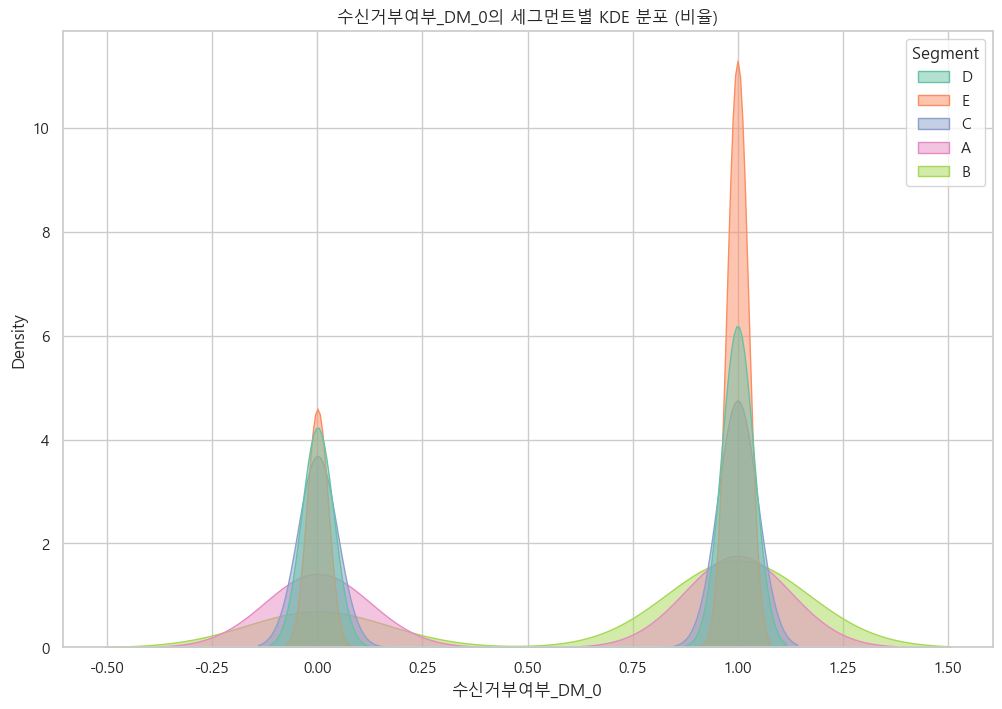

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


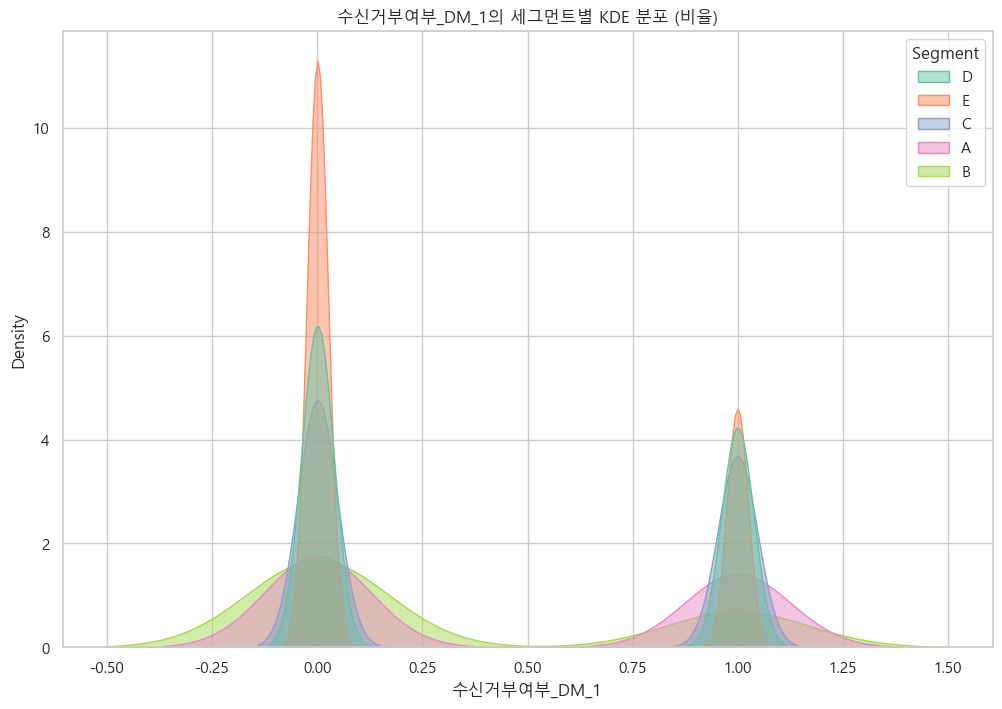

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


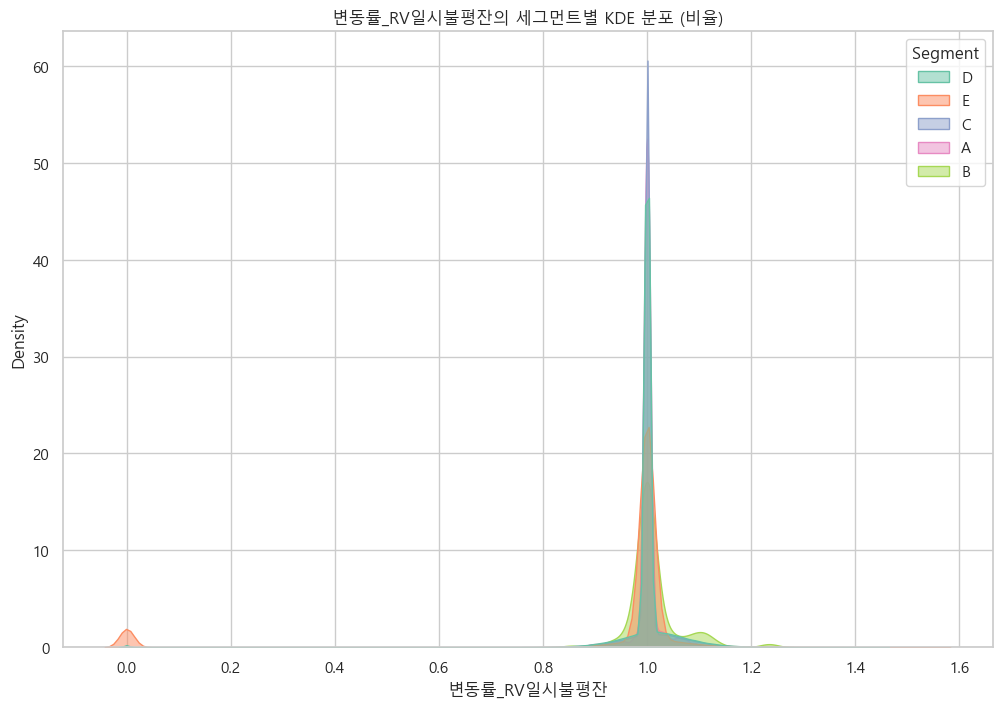

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


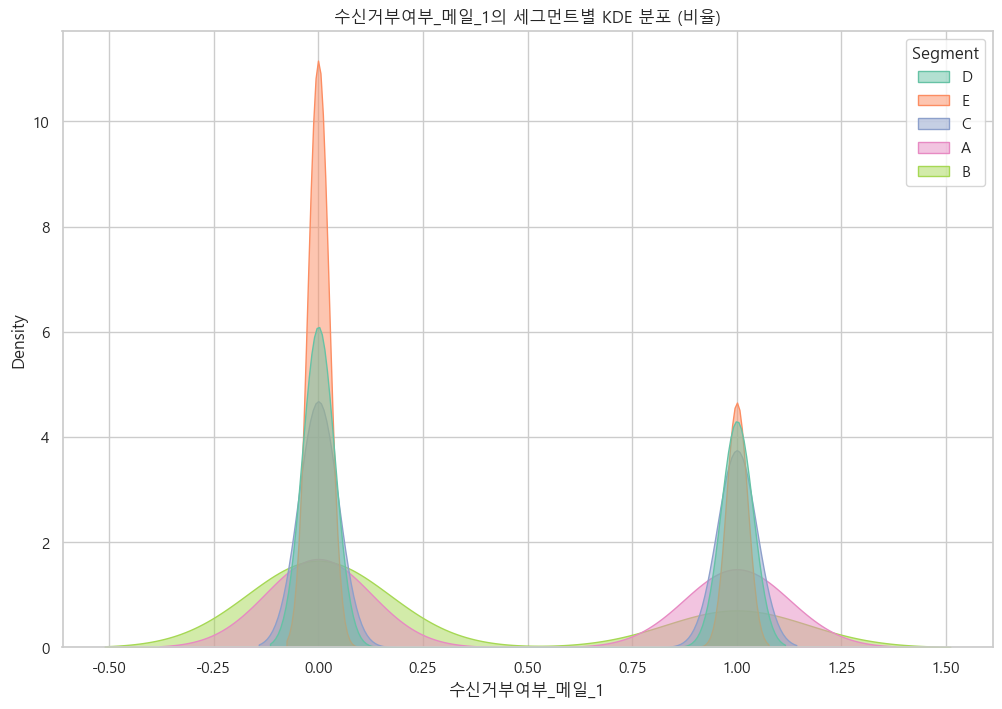

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


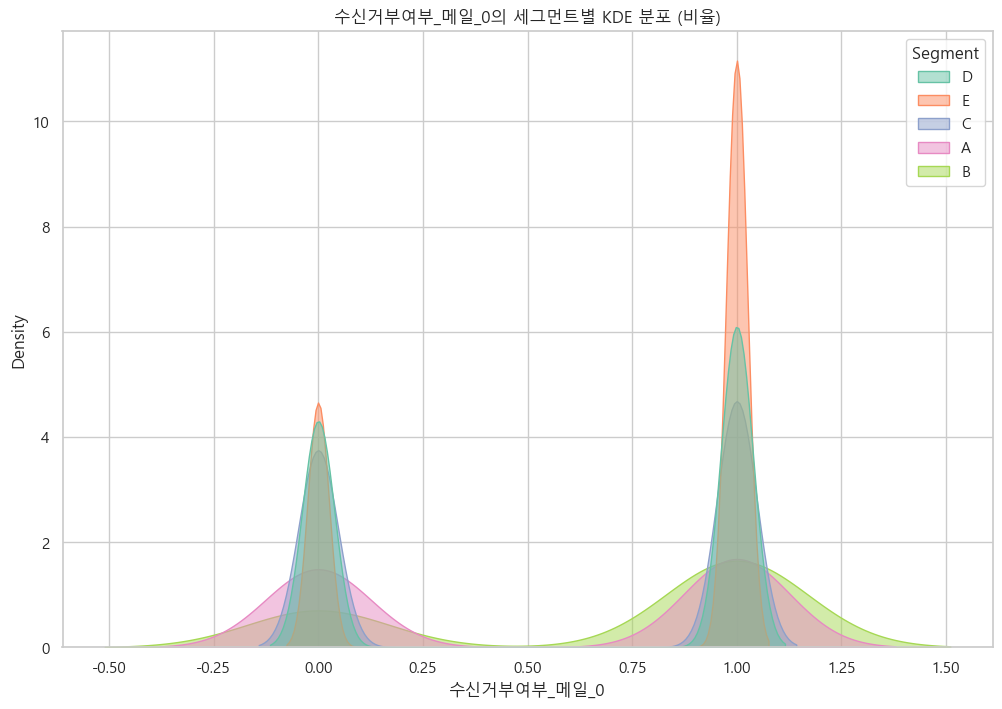

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


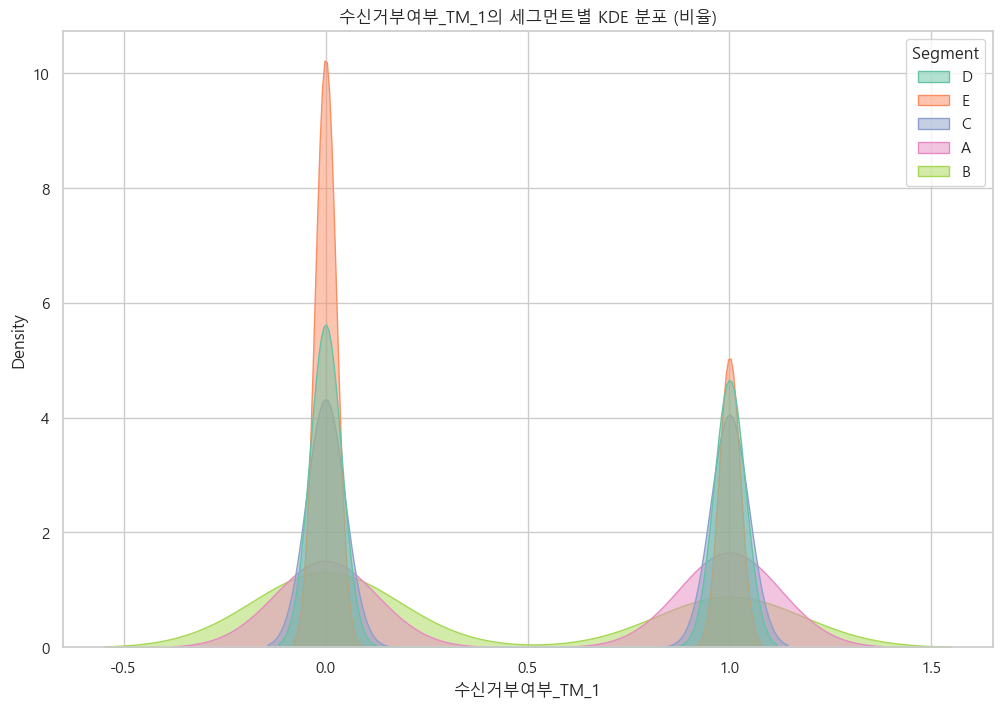

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


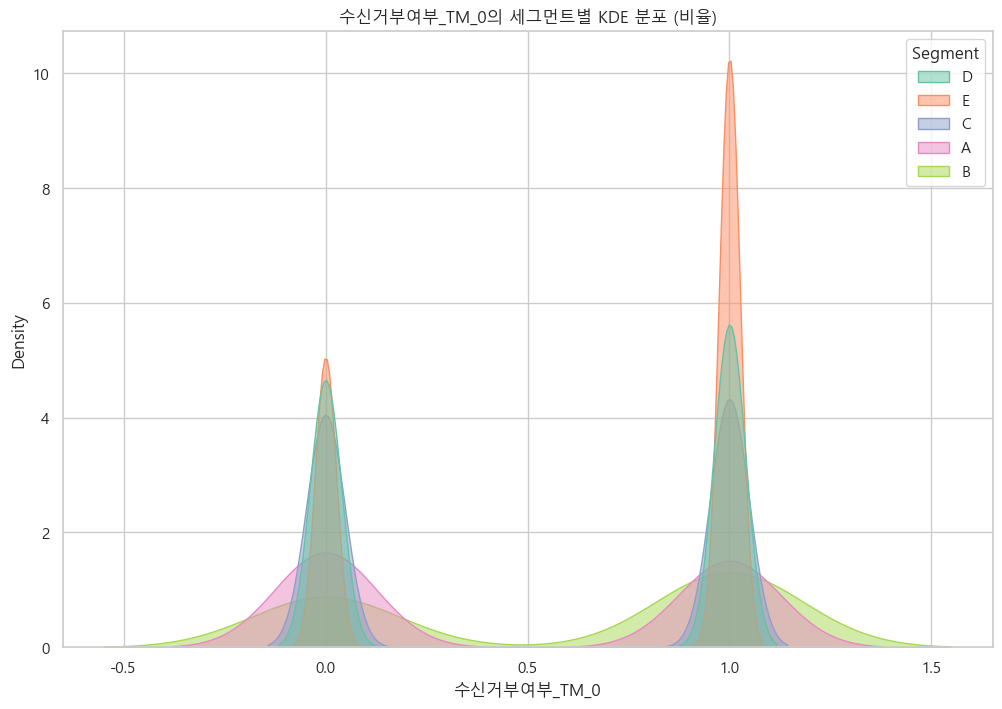

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


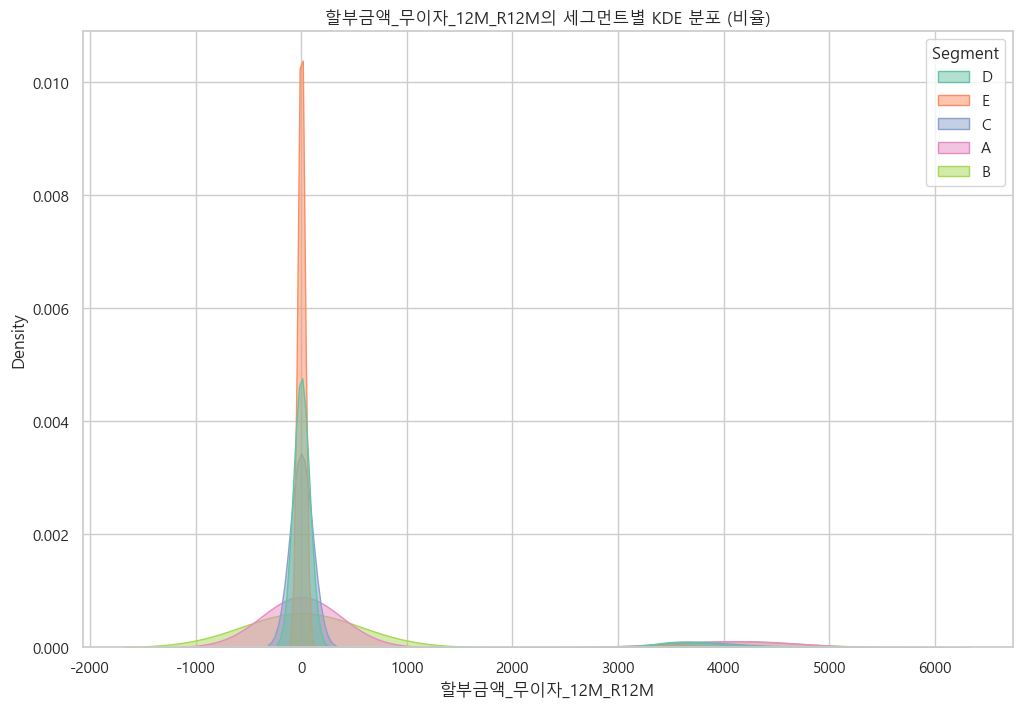

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


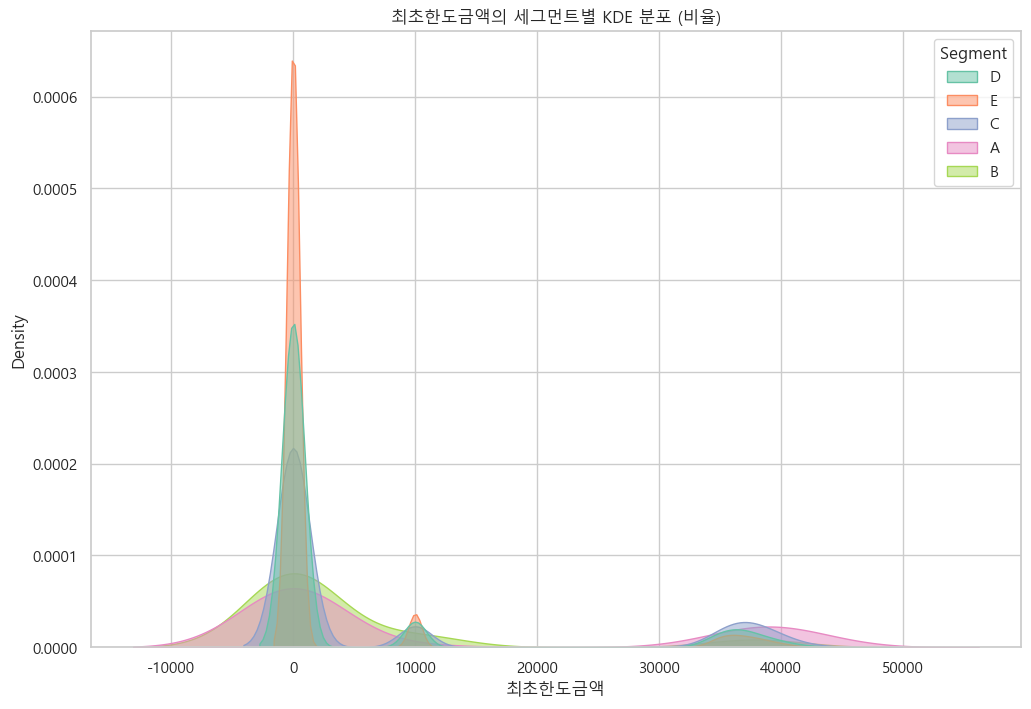

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


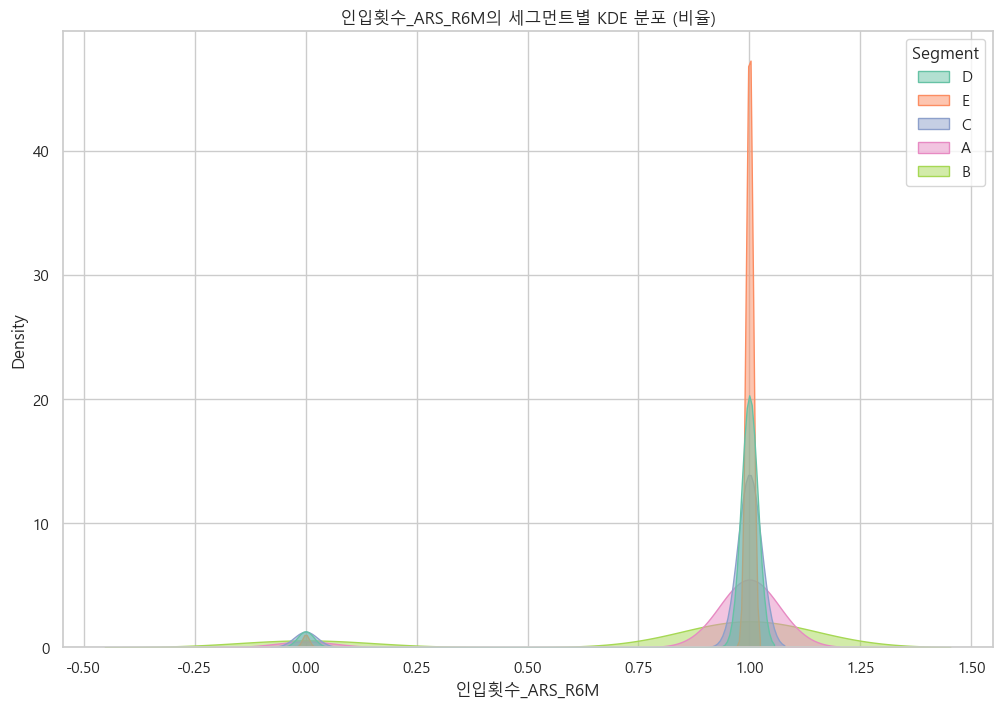

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


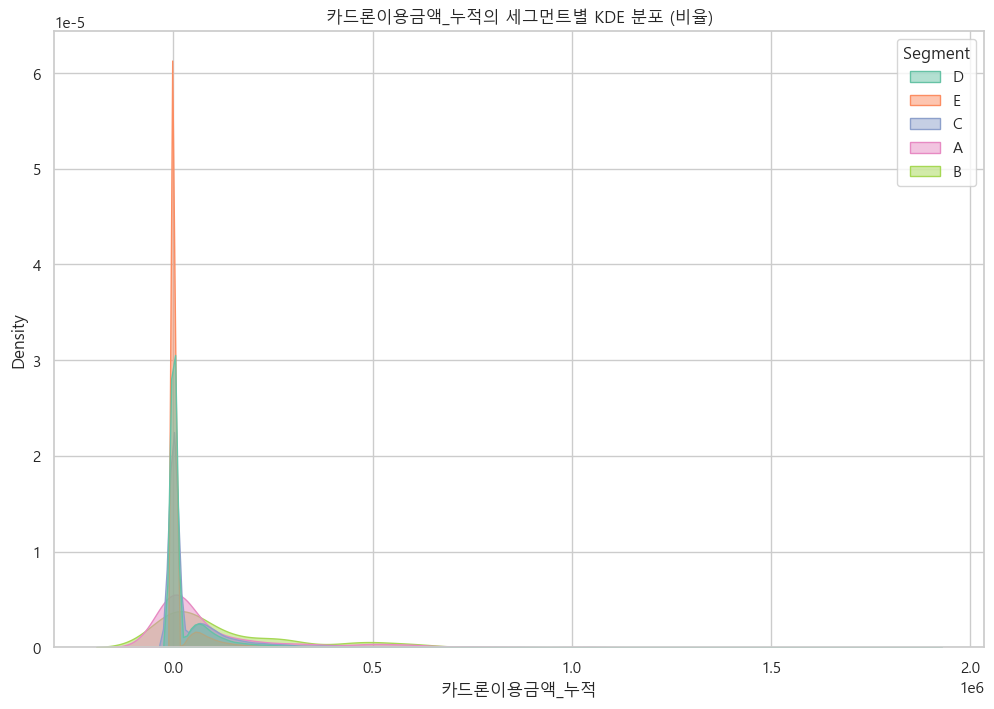

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


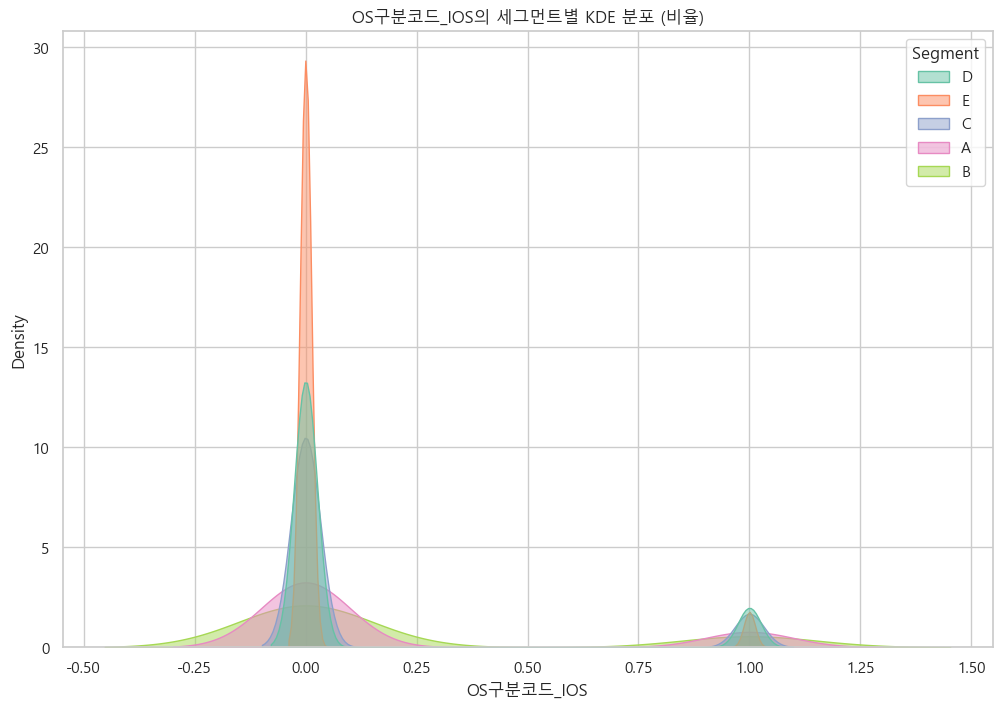

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\3247994859.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)


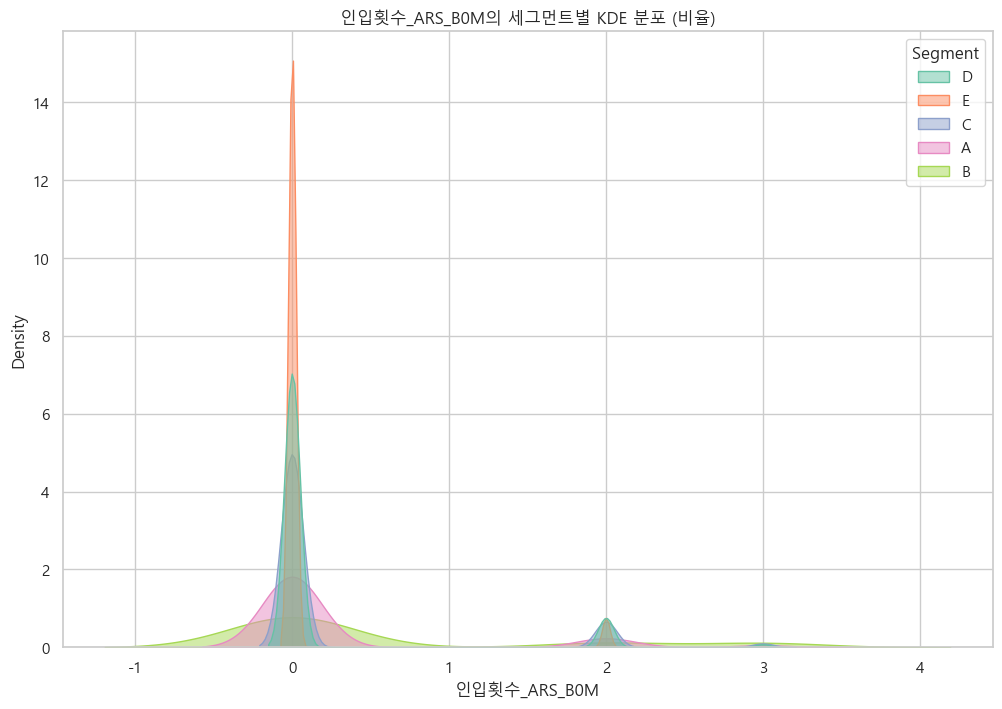

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화 대상 피처 (Segment 제외)
features = final_low_df.columns.drop('Segment')

# 2개씩 나누기
chunk_size = 2
numeric_chunks = [features[i:i + chunk_size] for i in range(0, len(features), chunk_size)]

# 함수 정의: 각 수치형 변수에 대해 세그먼트별 KDE 시각화 (비율 기준)
def plot_segment_kde_numeric(df, cols):
    for col in cols:
        # 각 세그먼트별로 데이터 추출
        plt.figure(figsize=(12, 8))
        
        # kdeplot 그리기
        sns.kdeplot(data=df, x=col, hue='Segment', common_norm=False, shade=True, alpha=0.5)

        # 타이틀 및 레이블 설정
        plt.title(f'{col}의 세그먼트별 KDE 분포 (비율)')
        plt.xlabel(col)
        plt.ylabel('Density')

        # 그래프 출력
        plt.show()

# 2씩 나눠서 시각화
for chunk in numeric_chunks:
    plot_segment_kde_numeric(final_low_df, chunk)


C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


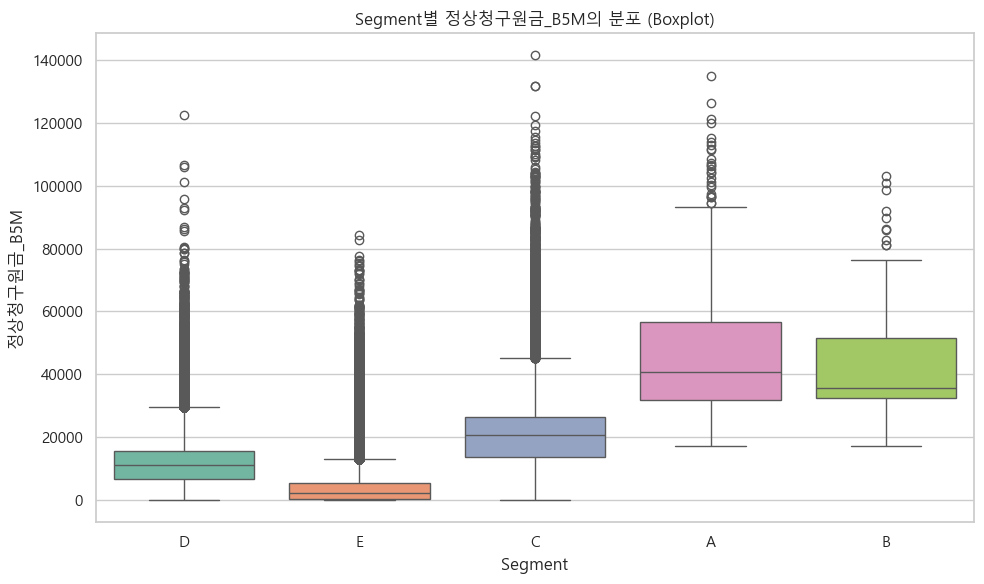

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


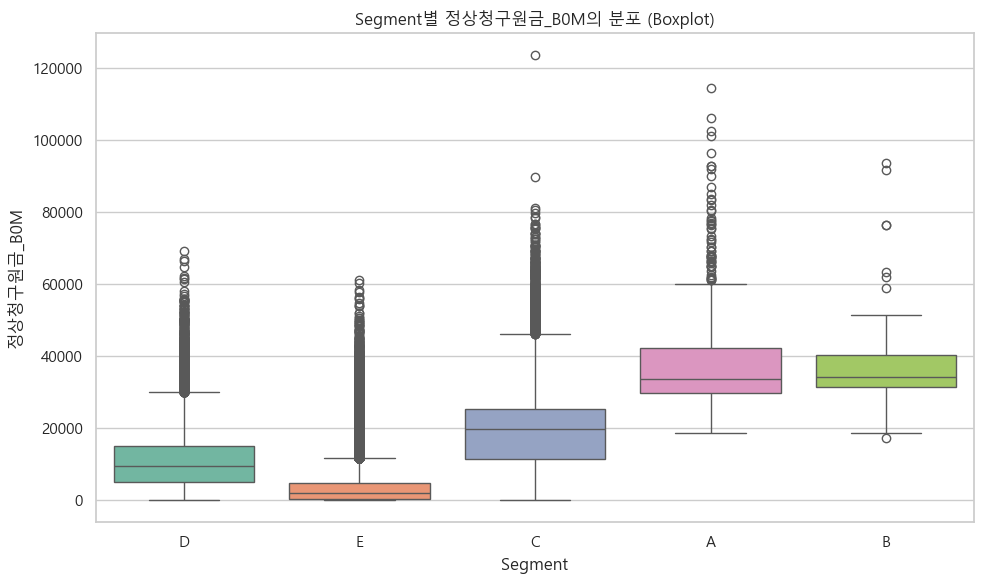

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


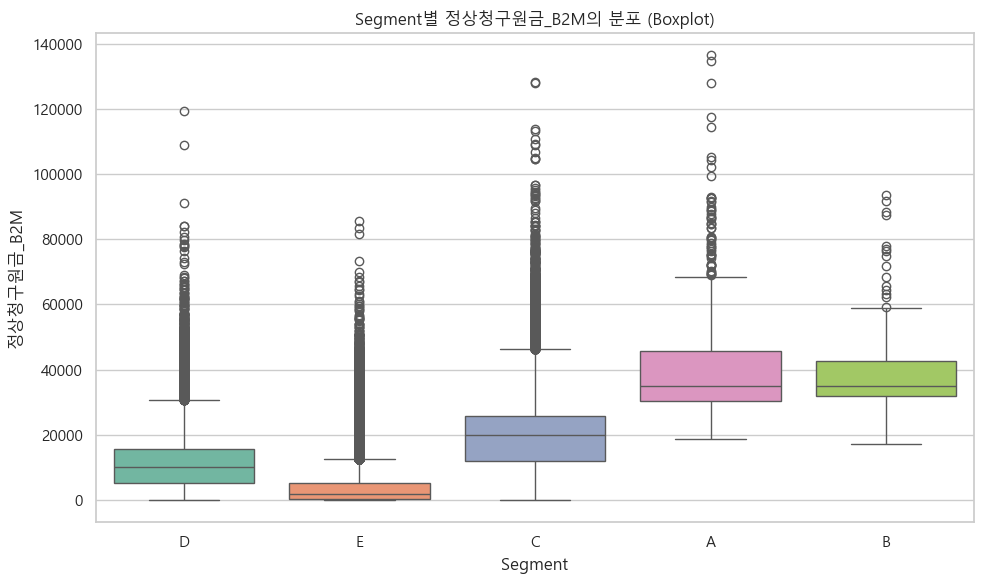

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


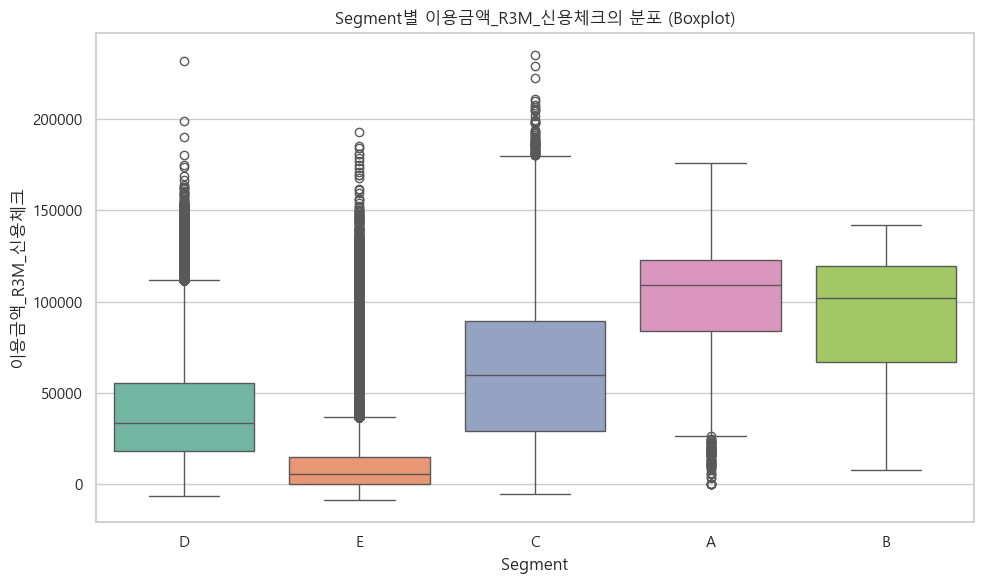

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


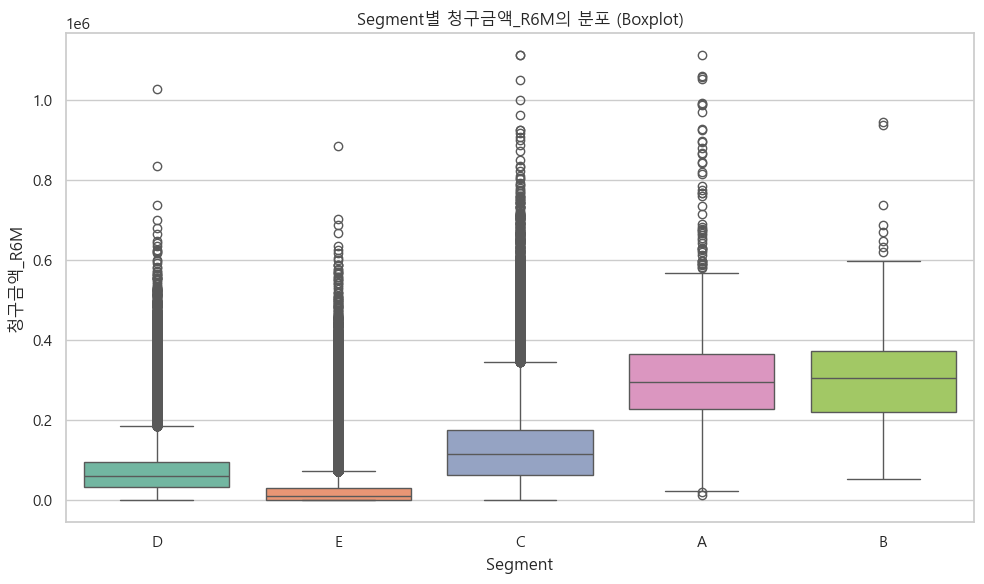

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


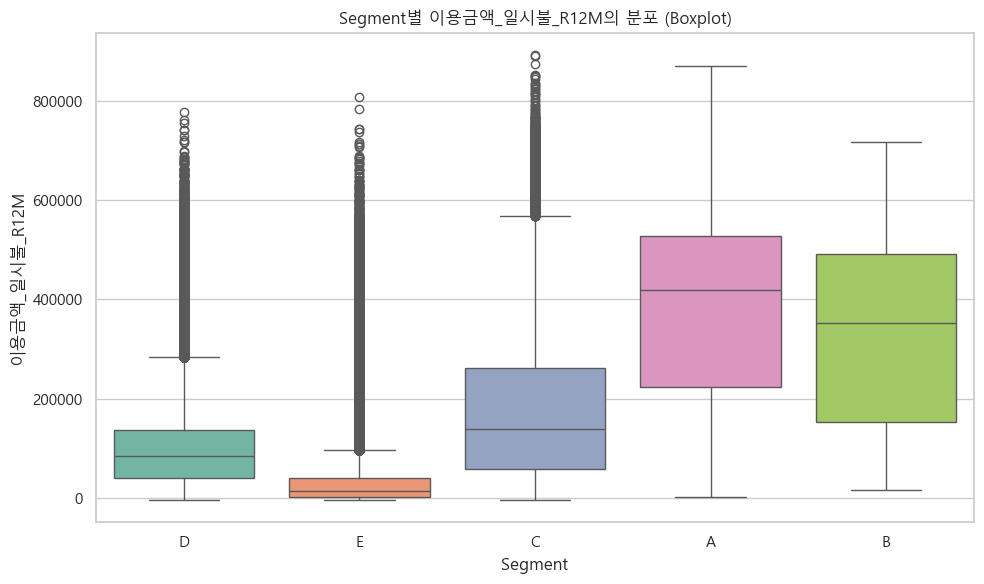

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


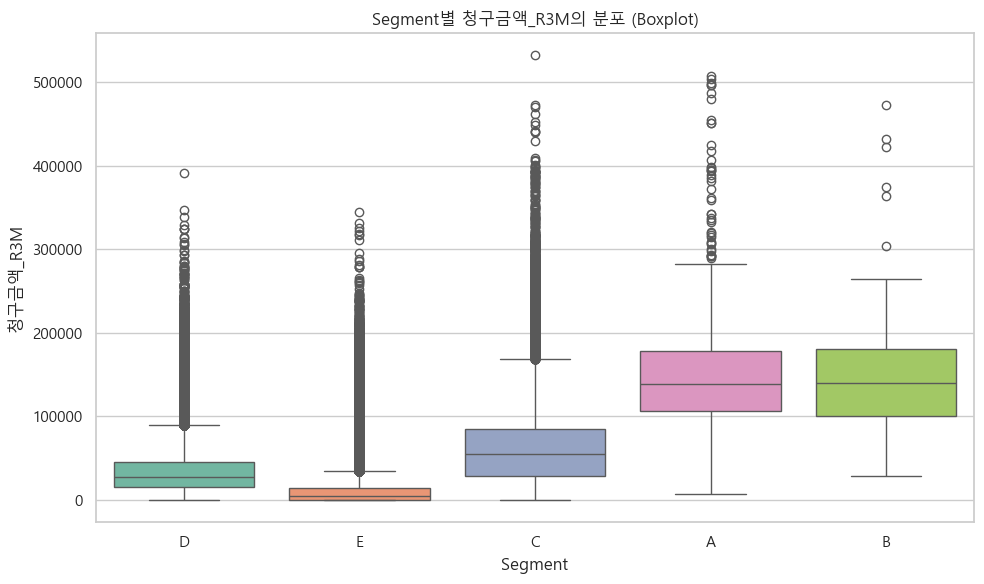

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


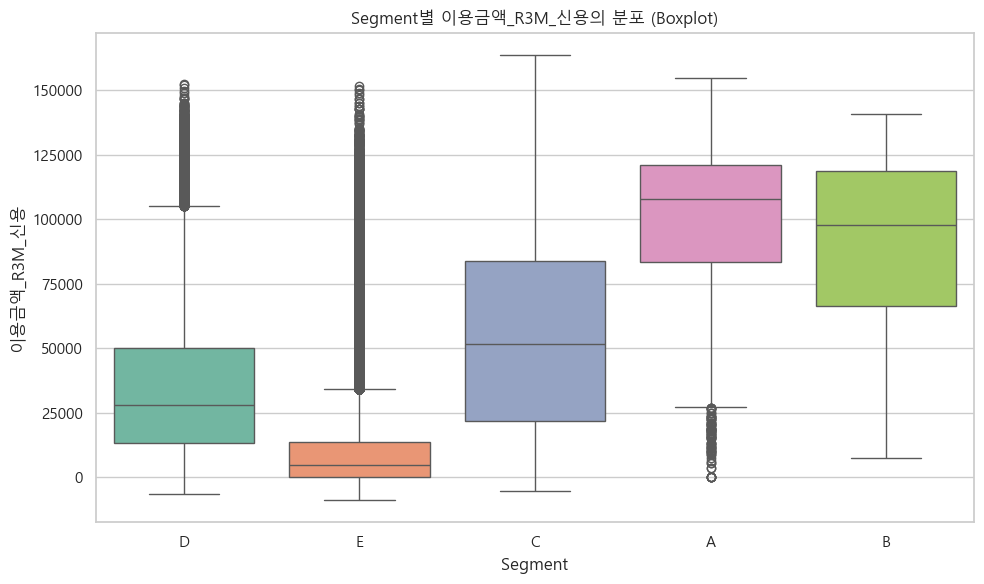

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


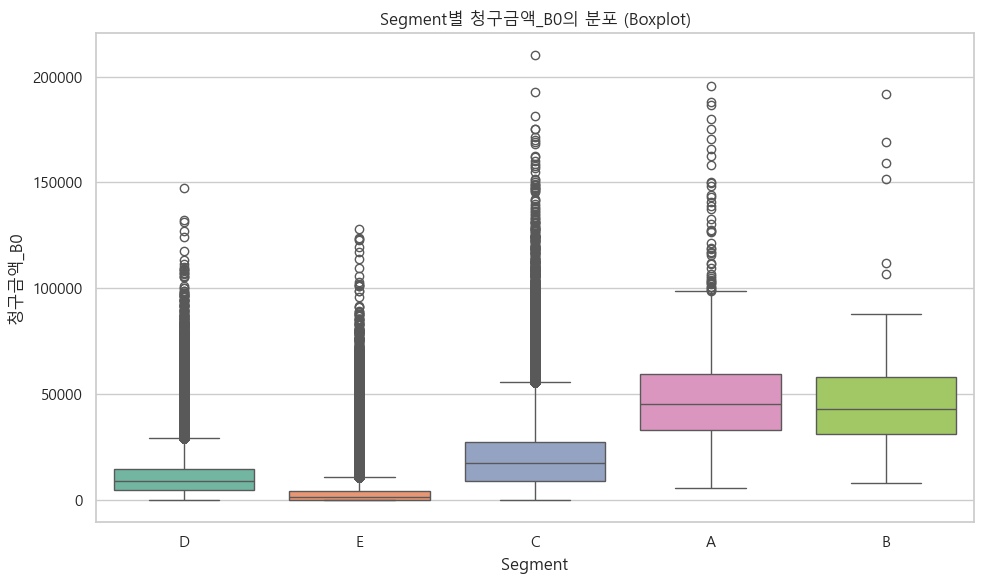

C:\Users\campus4D042\AppData\Local\Temp\ipykernel_13704\2023201745.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')


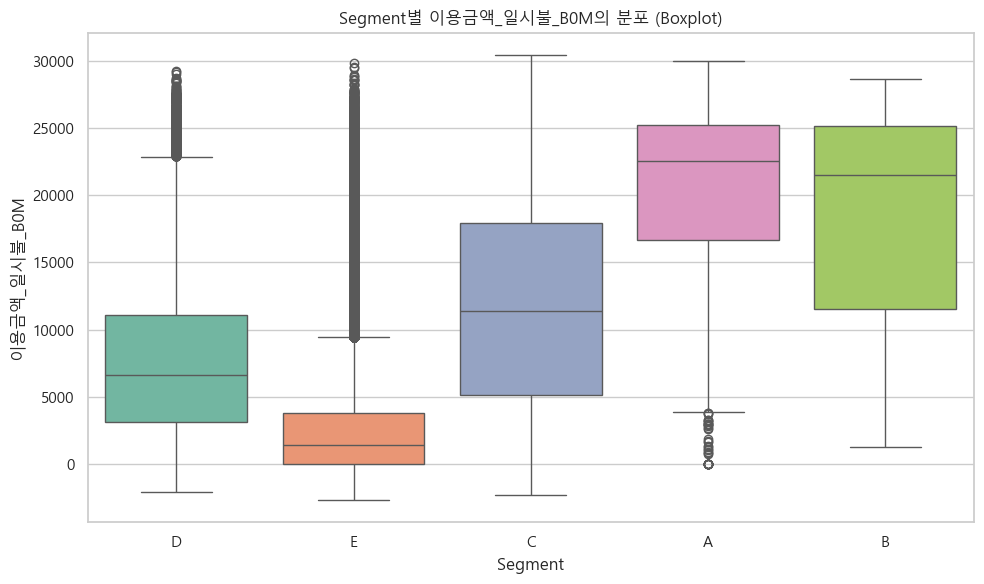

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시로 사용할 피처 리스트 (상관계수 기준 상위 10개)
selected_features = correlation_df.sort_values(by='Correlation_with_Segment', key=abs, ascending=False).head(10)['Feature'].tolist()

# 박스플롯 시각화 함수
def plot_boxplots(df, features):
    for feature in features:
        if feature in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x='Segment', y=feature, palette='Set2')
            plt.title(f'Segment별 {feature}의 분포 (Boxplot)')
            plt.xlabel('Segment')
            plt.ylabel(feature)
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ '{feature}' 컬럼은 데이터프레임에 없음.")

# 실행
plot_boxplots(final_df, selected_features)